In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

In [2]:
N = 4096
FOV = 10e-3
dx = FOV/N

E0 = 9500

beam_params = {
    'photonEnergy': E0-1,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'z0x': 110,
    'z0y': 110,
    'rangeFactor': 5,
    'scaleFactor': 20,
    'z_source': 630
}

In [3]:
b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286, orientation=2)

alphaAsym = 5*np.pi/180

# slit = optics.Slit('slit', z=989.9, x_width=20e-6, y_width=500e-6)
entrance_slit = optics.Slit('entrance', z=989, x_width=.5e-3, y_width=.5e-3)

crystal1 = optics.Crystal('c1', hkl=[2,2,0], length=1e-2, width=10e-3, z=990, E0=E0,
                          alphaAsym=0, orientation=2,pol='p')

# should be orientation 0
crystal2 = optics.Crystal('c2', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.012, E0=E0,alphaAsym=alphaAsym, 
                          orientation=0,pol='p')
crystal3 = optics.Crystal('c3', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.112, E0=E0,alphaAsym=0, orientation=0,
                         asym_type='emergence',pol='p')
# should be orientation 0
crystal4 = optics.Crystal('c4', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.124, E0=E0,alphaAsym=alphaAsym, 
                          asym_type='emergence', orientation=2,pol='p')
# crystal5 = optics.Crystal('c1', hkl=[2,2,0], length=1.5e-2, z=792, E0=9500,alphaAsym=0*np.pi/180, 
#                           orientation=0)

# print('b: %.2f' % crystal2.b)

crl1 = optics.CRL('crlx', z=990.15, roc=7e-6)
crl2 = optics.CRL('crly', z=990.15,orientation=1, roc=7e-6)
slit = optics.Slit('slit', z=990.2, x_width=500e-6, y_width=500e-6)

# print(crystal.alpha*180/np.pi)
# print(crystal.beta0*180/np.pi)
print((np.sin(crystal2.beta0)/np.sin(crystal2.alpha)))
print(crystal4.alpha*180/np.pi)
# print(crystal5.alpha*180/np.pi)
print(crystal4.beta0*180/np.pi)

# Stack of 20 CRLs for tight focus
# crl_list = []
# for i in range(20):
#     crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=0e-6, ))

IP = optics.PPM('IP', FOV=50e-6, z=991.08, N=256)
upstream_YAG = optics.PPM('YAG1',FOV=1e-3,z=entrance_slit.z + .05, N=256)

# YAG_mid = optics.PPM('YAG_mid',FOV=30e-3,z=990.2, N=256)

downstream_YAG = optics.PPM('YAG2',FOV=1e-3,z=crystal4.z + 4, N=256)
# downstream_YAG = optics.PPM('YAG', FOV=3e-3, z=803, N=256)

# devices = [mr1l0,mr2l0,upstream_YAG]
devices = [mr1l0,mr2l0,entrance_slit,upstream_YAG, downstream_YAG, IP,crystal1,crystal2,crystal3,crystal4, slit]
# devices = devices + crl_list

XPP = beamline.Beamline(devices)

k_ix = -np.sin(crystal1.alpha)
k_iy = np.sin(0)
# k_iz = np.sqrt(1 - k_ix ** 2 - k_iy ** 2)
k_iz = np.cos(crystal1.alpha)
k_i = np.array([k_ix,k_iy,k_iz])

print(crystal2.rotation_crystal(k_i, b1.lambda0))
print(crystal1.crystal.get_Darwin_width(14410))

FWHM in x: 359.94241998612466 microns
FWHM in y: 359.94241998612466 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415750474835558
5.415750474835558
b 1.00
b 1.64
b 1.00
b 1.64
0.6102211874545929
24.86894226347203
14.869889912414962
after mr1l0: 0.0042
after mr2l0: 0.0000
after c1: -0.6936
after c2: 0.0000
after c3: 0.6936
after c4: 0.0000
(array([-0.23281791,  0.        ,  0.0332055 ]), array([0.023807  , 0.        , 0.99971657]))
1.3620401788281523e-05


In [4]:
print(crystal2.alpha)

0.43404492398595806


In [5]:
print(mr1l0.global_x)
print(mr1l0.global_alpha)
print(mr2l0.global_x)
print(mr2l0.global_alpha)
print(crystal1.global_x)
print(crystal1.global_alpha)
print(crystal2.global_x)
print(crystal2.global_alpha)
print(crystal3.global_x)
print(crystal3.global_alpha)
print(crystal4.global_x)
print(crystal4.global_alpha)

0
0.0021
0.030601379936325394
0.0021
0.030601379936325394
-0.346781770654042
0.020625242862907543
-0.2595186173221258
0.02062623496876823
0.3467916917126485
0.03060257337802781
0.2595285383807323


FWHM in x: 359.94241998612466 microns
FWHM in y: 359.94241998612466 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415750474835558
5.415750474835558
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.00
zRx: 77639951.77 microns
zRy: 77639951.77 microns
remaining distance: 7286064.26 microns
goal for zx: 117286064.26 microns
current zx: 110000000.00 microns
goal for zy: 117286064.26 microns
current zy: 110000000.00 microns
zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77639951.77 microns
zRy: 77639951.77 microns
remaining distance: 241714000.00 microns
goal for zx: 359000064.26 microns
current zx: 117286064.26 microns

<IPython.core.display.Javascript object>


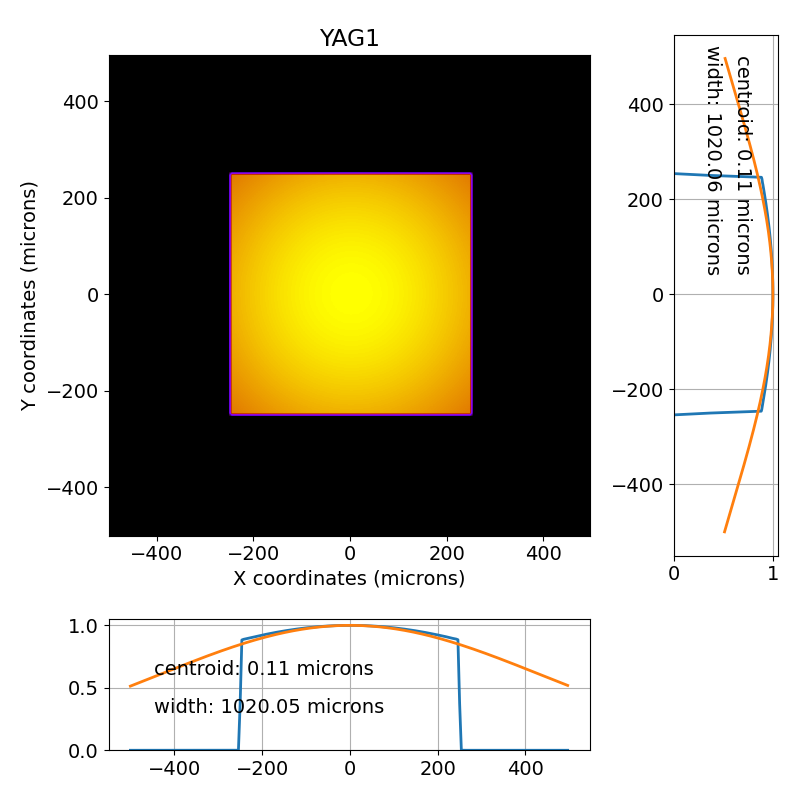

<IPython.core.display.Javascript object>


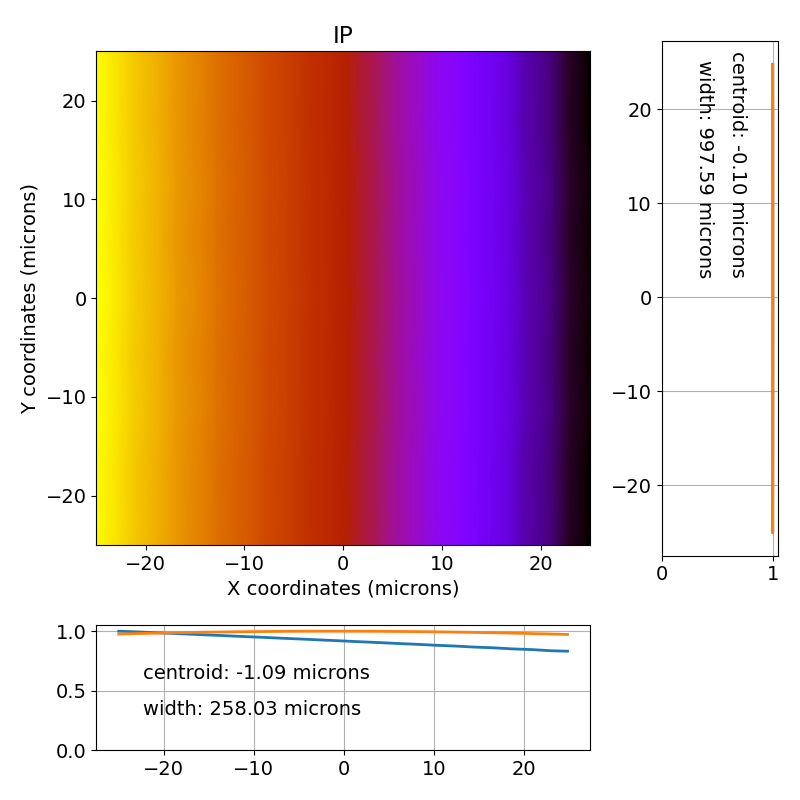

<IPython.core.display.Javascript object>


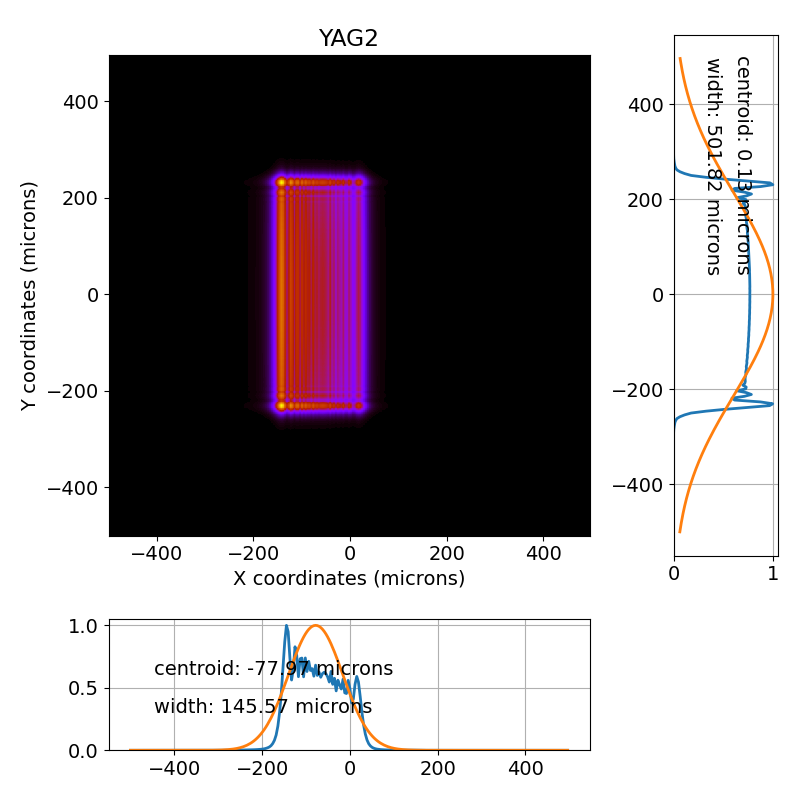

<IPython.core.display.Javascript object>


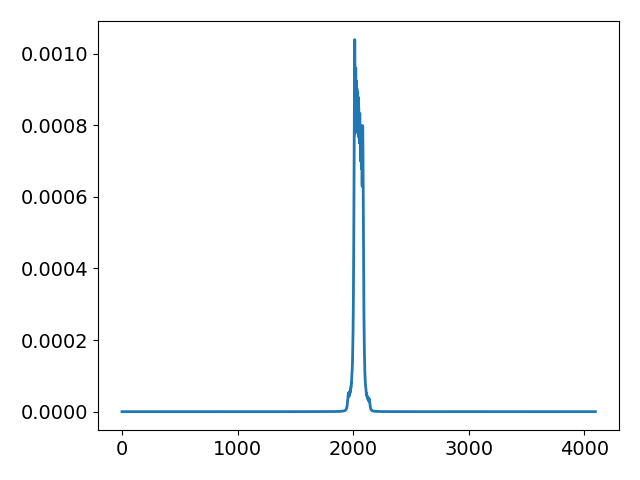

In [6]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
XPP.IP.view_beam()
XPP.YAG2.view_beam()
# XPP.YAG_mid.view_beam()
# XPP.IP.view_beam()
# XPP.YAG.view_beam()
plt.figure()
plt.plot(np.abs(b2.wavex))

In [7]:
beam_params['photonEnergy'] = 9500

pulse_test = beam.Pulse(beam_params=beam_params, tau=5, time_window=500)

In [8]:
pulse_test.propagate(beamline=XPP, screen_names=['YAG1','YAG2'])

FWHM in x: 359.9397726303027 microns
FWHM in y: 359.9397726303027 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4157904042178435
5.4157904042178435
FWHM in x: 359.9397726303027 microns
FWHM in y: 359.9397726303027 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4157904042178435
5.4157904042178435
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77640521.43 microns
zRy: 77640521.43 microns
remaining distance: 7286064.26 microns
goal for zx: 117286064.26 microns
current zx: 110000000.00 microns
goal for zy: 117286064.26 microns
current zy: 110000000.00 microns
zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00


zx: 360.000064
zy: 360.000064
azimuth -0.00 mrad
c1
[-1.28785871e-14  0.00000000e+00  4.66293670e-15]
Calculated distance to focus: -360.000064
zRx: 7.76e+01
zRy: 7.76e+01
zx: 360.000064
zy: 360.000064
azimuth -693.56 mrad
drift5
global_x 0.03
global_y 0.00
x intersect: 2.0625e-02
component x: 2.0625e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77640724.95 microns
zRy: 77640724.96 microns
remaining distance: 15605.23 microns
goal for zx: 360015669.49 microns
current zx: 360000064.26 microns
goal for zy: 360015669.50 microns
current zy: 360000064.26 microns
zx: 360.015669
zy: 360.015669
azimuth -693.56 mrad
c2
[-2.12556430e-05  0.00000000e+00  5.64347967e-06]
Calculated distance to focus: -134.058998
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.047893
zy: 360.015669
azimuth -0.01 mrad
drift6
global_x 0.02
global_y 0.00
x intersect: 2.0624e-02
component x: 2.0626e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.06
zRx: 28911068.41 microns
zRy: 77640724.96 m

zx: 134.148092
zy: 360.115664
azimuth -0.01 mrad
c3
[ 2.03015899e-05  0.00000000e+00 -7.33695234e-06]
Calculated distance to focus: -134.148092
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.140092
zy: 360.115664
azimuth 693.60 mrad
drift7
global_x 0.02
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.01
zRx: 28907670.72 microns
zRy: 77640860.64 microns
remaining distance: 15605.95 microns
goal for zx: 134155697.84 microns
current zx: 134140091.89 microns
goal for zy: 360131269.48 microns
current zy: 360115663.52 microns
zx: 134.155698
zy: 360.131269
azimuth 693.60 mrad
c4
[ 1.33024538e-05  0.00000000e+00 -3.53212269e-06]
Calculated distance to focus: -49.955543
zRx: 1.08e+01
zRy: 7.76e+01
zx: 49.953495
zy: 360.131269
azimuth -0.01 mrad
drift8
global_x 0.03
global_y 0.00
x intersect: 3.0600e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.05
zRx: 10763349.59 microns
zRy: 77640860.64 mic

zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.048303
zy: 360.015669
azimuth -0.01 mrad
drift6
global_x 0.02
global_y 0.00
x intersect: 2.0624e-02
component x: 2.0626e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.06
zRx: 28911169.48 microns
zRy: 77640996.32 microns
remaining distance: 99994.14 microns
goal for zx: 134148296.90 microns
current zx: 134048302.76 microns
goal for zy: 360115663.64 microns
current zy: 360015669.50 microns
zx: 134.148297
zy: 360.115664
azimuth -0.01 mrad
c3
[ 1.99202895e-05  0.00000000e+00 -7.19914663e-06]
Calculated distance to focus: -134.148297
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.140447
zy: 360.115664
azimuth 693.59 mrad
drift7
global_x 0.02
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.01
zRx: 28907786.01 microns
zRy: 77640996.32 microns
remaining distance: 15605.94 microns
goal for zx: 134156052.91 microns
current zx: 134140446.97 microns
goal for zy: 360131269.58 microns
c

zRx: 7.76e+01
zRy: 7.76e+01
zx: 360.000064
zy: 360.000064
azimuth -693.56 mrad
drift5
global_x 0.03
global_y 0.00
x intersect: 2.0625e-02
component x: 2.0625e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77641132.00 microns
zRy: 77641132.00 microns
remaining distance: 15605.23 microns
goal for zx: 360015669.50 microns
current zx: 360000064.26 microns
goal for zy: 360015669.50 microns
current zy: 360000064.26 microns
zx: 360.015669
zy: 360.015669
azimuth -693.56 mrad
c2
[-2.00800607e-05  0.00000000e+00  5.33136975e-06]
Calculated distance to focus: -134.058998
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.048507
zy: 360.015669
azimuth -0.01 mrad
drift6
global_x 0.02
global_y 0.00
x intersect: 2.0624e-02
component x: 2.0626e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.06
zRx: 28911220.02 microns
zRy: 77641132.00 microns
remaining distance: 99994.25 microns
goal for zx: 134148501.74 microns
current zx: 134048507.49 microns
goal for zy: 360115663.75 microns

zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
YAG1
zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
drift4
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77641267.69 microns
zRy: 77641267.69 microns
remaining distance: 950000.00 microns
goal for zx: 360000064.26 microns
current zx: 359050064.26 microns
goal for zy: 360000064.26 microns
current zy: 359050064.26 microns
zx: 360.000064
zy: 360.000064
azimuth -0.00 mrad
c1
[-1.28785871e-14  0.00000000e+00  4.66293670e-15]
Calculated distance to focus: -360.000064
zRx: 7.76e+01
zRy: 7.76e+01
zx: 360.000064
zy: 360.000064
azimuth -693.56 mrad
drift5
global_x 0.03
global_y 0.00
x intersect: 2.0625e-02
component x: 2.0625e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77641267.69 microns
zRy: 77641267.69 microns
remaining distance: 15605.23 microns
goal for zx: 360015669.50 microns
current zx: 360000064.26 microns
goal for

zx: 360.015669
zy: 360.015669
azimuth -693.56 mrad
c2
[-1.92963493e-05  0.00000000e+00  5.12329831e-06]
Calculated distance to focus: -134.058998
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.048917
zy: 360.015669
azimuth -0.01 mrad
drift6
global_x 0.02
global_y 0.00
x intersect: 2.0624e-02
component x: 2.0626e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.06
zRx: 28911321.10 microns
zRy: 77641403.37 microns
remaining distance: 99994.48 microns
goal for zx: 134148911.44 microns
current zx: 134048916.96 microns
goal for zy: 360115663.97 microns
current zy: 360015669.50 microns
zx: 134.148911
zy: 360.115664
azimuth -0.01 mrad
c3
[ 1.8776400e-05  0.0000000e+00 -6.7857347e-06]
Calculated distance to focus: -134.148911
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.141512
zy: 360.115664
azimuth 693.59 mrad
drift7
global_x 0.02
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.01
zRx: 28908131.87 microns
zRy: 77641403.37 micr

Calculated distance to focus: -134.149116
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.141867
zy: 360.115664
azimuth 693.59 mrad
drift7
global_x 0.02
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.01
zRx: 28908247.15 microns
zRy: 77641539.05 microns
remaining distance: 15605.90 microns
goal for zx: 134157473.17 microns
current zx: 134141867.27 microns
goal for zy: 360131269.98 microns
current zy: 360115664.08 microns
zx: 134.157473
zy: 360.131270
azimuth 693.59 mrad
c4
[ 1.20531401e-05  0.00000000e+00 -3.20039139e-06]
Calculated distance to focus: -49.956205
zRx: 1.08e+01
zRy: 7.76e+01
zx: 49.954349
zy: 360.131270
azimuth -0.01 mrad
drift8
global_x 0.03
global_y 0.00
x intersect: 3.0600e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.05
zRx: 10763657.82 microns
zRy: 77641539.05 microns
remaining distance: 76005.20 microns
goal for zx: 50030353.78 microns
current zx: 49954348.58 mic

Calculated distance to focus: -134.149321
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.142222
zy: 360.115664
azimuth 693.59 mrad
drift7
global_x 0.02
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.01
zRx: 28908362.44 microns
zRy: 77641674.73 microns
remaining distance: 15605.89 microns
goal for zx: 134157828.22 microns
current zx: 134142222.34 microns
goal for zy: 360131270.08 microns
current zy: 360115664.20 microns
zx: 134.157828
zy: 360.131270
azimuth 693.59 mrad
c4
[ 1.18032837e-05  0.00000000e+00 -3.13404703e-06]
Calculated distance to focus: -49.956337
zRx: 1.08e+01
zRy: 7.76e+01
zx: 49.954519
zy: 360.131270
azimuth -0.01 mrad
drift8
global_x 0.03
global_y 0.00
x intersect: 3.0600e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.05
zRx: 10763719.46 microns
zRy: 77641674.73 microns
remaining distance: 76005.09 microns
goal for zx: 50030524.34 microns
current zx: 49954519.25 mic

Calculated distance to focus: -49.956469
zRx: 1.08e+01
zRy: 7.76e+01
zx: 49.954690
zy: 360.131270
azimuth -0.01 mrad
drift8
global_x 0.03
global_y 0.00
x intersect: 3.0600e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.05
zRx: 10763781.11 microns
zRy: 77641810.42 microns
remaining distance: 76004.98 microns
goal for zx: 50030694.90 microns
current zx: 49954689.92 microns
goal for zy: 360207275.16 microns
current zy: 360131270.18 microns
zx: 50.030695
zy: 360.207275
azimuth -0.01 mrad
slit
zx: 50.030695
zy: 360.207275
azimuth -0.01 mrad
drift9
global_x 0.03
global_y 0.00
x intersect: 3.0590e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.00
zRx: 10763781.11 microns
zRy: 77641810.42 microns
remaining distance: 880000.00 microns
goal for zx: 50910694.90 microns
current zx: 50030694.90 microns
goal for zy: 361087275.16 microns
current zy: 360207275.16 microns
zx: 50.910695
zy: 361.087275
azimuth -0.01 mrad
IP


zx: 50.910865
zy: 361.087275
azimuth -0.01 mrad
IP
zx: 50.910865
zy: 361.087275
azimuth -0.01 mrad
drift10
global_x 0.03
global_y 0.00
x intersect: 3.0555e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.00
zRx: 10763842.76 microns
zRy: 77641946.10 microns
remaining distance: 3044000.00 microns
goal for zx: 53954865.47 microns
current zx: 50910865.47 microns
goal for zy: 364131275.16 microns
current zy: 361087275.16 microns
zx: 53.954865
zy: 364.131275
azimuth -0.01 mrad
YAG2
zx: 53.954865
zy: 364.131275
azimuth -0.01 mrad
FWHM in x: 359.9328367187691 microns
FWHM in y: 359.9328367187691 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4158950195707884
5.4158950195707884
FWHM in x: 359.9328367187691 microns
FWHM in y: 359.9328367187691 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4158950195707884
5.4158950195707884
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00

FWHM in x: 359.93220619466 microns
FWHM in y: 359.93220619466 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41590453005742
5.41590453005742
FWHM in x: 359.93220619466 microns
FWHM in y: 359.93220619466 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41590453005742
5.41590453005742
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77642149.62 microns
zRy: 77642149.62 microns
remaining distance: 7286064.26 microns
goal for zx: 117286064.26 microns
current zx: 110000000.00 microns
goal for zy: 117286064.26 microns
current zy: 110000000.00 microns
zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zR

zx: 53.955207
zy: 364.131275
azimuth -0.01 mrad
YAG2
zx: 53.955207
zy: 364.131275
azimuth -0.01 mrad
FWHM in x: 359.93157567276796 microns
FWHM in y: 359.93157567276796 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415914040544052
5.415914040544052
FWHM in x: 359.93157567276796 microns
FWHM in y: 359.93157567276796 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415914040544052
5.415914040544052
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77642285.30 microns
zRy: 77642285.30 microns
remaining distance: 7286064.26 microns
goal for zx: 117286064.26 microns
current zx: 110000000.00 microns
goal for zy: 117286064.26 microns
current zy: 110000000.00 microns
zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 

zx: 53.955377
zy: 364.131275
azimuth -0.01 mrad
YAG2
zx: 53.955377
zy: 364.131275
azimuth -0.01 mrad
FWHM in x: 359.9309451530929 microns
FWHM in y: 359.9309451530929 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415923551030683
5.415923551030683
FWHM in x: 359.9309451530929 microns
FWHM in y: 359.9309451530929 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415923551030683
5.415923551030683
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77642420.99 microns
zRy: 77642420.99 microns
remaining distance: 7286064.26 microns
goal for zx: 117286064.26 microns
current zx: 110000000.00 microns
goal for zy: 117286064.26 microns
current zy: 110000000.00 microns
zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00

mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77642556.67 microns
zRy: 77642556.67 microns
remaining distance: 7286064.26 microns
goal for zx: 117286064.26 microns
current zx: 110000000.00 microns
goal for zy: 117286064.26 microns
current zy: 110000000.00 microns
zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77642556.67 microns
zRy: 77642556.67 microns
remaining distance: 241714000.00 microns
goal for zx: 359000064.26 microns
current zx: 117286064.26 microns
goal for zy: 359000064.26 microns
current zy: 117286064.26 microns
zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
entrance
zx: 359.000064
zy: 359.000064
azimuth -0.00 mra

zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77642692.35 microns
zRy: 77642692.35 microns
remaining distance: 241714000.00 microns
goal for zx: 359000064.26 microns
current zx: 117286064.26 microns
goal for zy: 359000064.26 microns
current zy: 117286064.26 microns
zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
entrance
zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
drift3
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77642692.35 microns
zRy: 77642692.35 microns
remaining distance: 50000.00 microns
goal for zx: 359050064.26 microns
current zx: 359000064.26 microns
goal for zy: 359050064.26 microns
current zy: 359000064.26 microns
zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
YAG1


zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
entrance
zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
drift3
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77642828.03 microns
zRy: 77642828.03 microns
remaining distance: 50000.00 microns
goal for zx: 359050064.26 microns
current zx: 359000064.26 microns
goal for zy: 359050064.26 microns
current zy: 359000064.26 microns
zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
YAG1
zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
drift4
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77642828.03 microns
zRy: 77642828.03 microns
remaining distance: 950000.00 microns
goal for zx: 360000064.26 microns
current zx: 359050064.26 microns
goal for zy: 360000064.26 microns
current zy: 359050064.26 microns
zx: 360.000064
zy: 360.000064
azimuth -0.00 mrad
c1
[-1.2

zx: 53.956059
zy: 364.131275
azimuth -0.01 mrad
FWHM in x: 359.9284230965638 microns
FWHM in y: 359.9284230965638 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415961592977209
5.415961592977209
FWHM in x: 359.9284230965638 microns
FWHM in y: 359.9284230965638 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415961592977209
5.415961592977209
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77642963.72 microns
zRy: 77642963.72 microns
remaining distance: 7286064.26 microns
goal for zx: 117286064.26 microns
current zx: 110000000.00 microns
goal for zy: 117286064.26 microns
current zy: 110000000.00 microns
zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y in

zRy: 77643031.56 microns
remaining distance: 3044000.00 microns
goal for zx: 53956229.97 microns
current zx: 50912229.97 microns
goal for zy: 364131275.10 microns
current zy: 361087275.10 microns
zx: 53.956230
zy: 364.131275
azimuth -0.01 mrad
YAG2
zx: 53.956230
zy: 364.131275
azimuth -0.01 mrad
FWHM in x: 359.9277925879743 microns
FWHM in y: 359.9277925879743 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415971103463839
5.415971103463839
FWHM in x: 359.9277925879743 microns
FWHM in y: 359.9277925879743 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415971103463839
5.415971103463839
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77643099.40 microns
zRy: 77643099.40 microns
remaining distance: 7286064.26 microns
goal for zx: 117286064.26 microns
current zx: 110000000.00 microns
goal for

FWHM in x: 359.92716208160164 microns
FWHM in y: 359.92716208160164 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41598061395047
5.41598061395047
FWHM in x: 359.92716208160164 microns
FWHM in y: 359.92716208160164 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41598061395047
5.41598061395047
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77643235.08 microns
zRy: 77643235.08 microns
remaining distance: 7286064.26 microns
goal for zx: 117286064.26 microns
current zx: 110000000.00 microns
goal for zy: 117286064.26 microns
current zy: 110000000.00 microns
zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delt

zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77643370.76 microns
zRy: 77643370.76 microns
remaining distance: 241714000.00 microns
goal for zx: 359000064.26 microns
current zx: 117286064.26 microns
goal for zy: 359000064.26 microns
current zy: 117286064.26 microns
zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
entrance
zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
drift3
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77643370.76 microns
zRy: 77643370.76 microns
remaining distance: 50000.00 microns
goal for zx: 359050064.26 microns
current zx: 359000064.26 microns
goal for zy: 359050064.26 microns
current zy: 359000064.26 microns
zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
YAG1


zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77643506.45 microns
zRy: 77643506.45 microns
remaining distance: 241714000.00 microns
goal for zx: 359000064.26 microns
current zx: 117286064.26 microns
goal for zy: 359000064.26 microns
current zy: 117286064.26 microns
zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
entrance
zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
drift3
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77643506.45 microns
zRy: 77643506.45 microns
remaining distance: 50000.00 microns
goal for zx: 359050064.26 microns
current zx: 359000064.26 microns
goal for zy: 359050064.26 microns
current zy: 359000064.26 microns
zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
YAG1


zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77643642.13 microns
zRy: 77643642.13 microns
remaining distance: 241714000.00 microns
goal for zx: 359000064.26 microns
current zx: 117286064.26 microns
goal for zy: 359000064.26 microns
current zy: 117286064.26 microns
zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
entrance
zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
drift3
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77643642.13 microns
zRy: 77643642.13 microns
remaining distance: 50000.00 microns
goal for zx: 359050064.26 microns
current zx: 359000064.26 microns
goal for zy: 359050064.26 microns
current zy: 359000064.26 microns
zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
YAG1


zx: 50.913083
zy: 361.087275
azimuth -0.01 mrad
drift10
global_x 0.03
global_y 0.00
x intersect: 3.0568e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.00
zRx: 10764644.16 microns
zRy: 77643709.97 microns
remaining distance: 3044000.00 microns
goal for zx: 53957082.78 microns
current zx: 50913082.78 microns
goal for zy: 364131275.07 microns
current zy: 361087275.07 microns
zx: 53.957083
zy: 364.131275
azimuth -0.01 mrad
YAG2
zx: 53.957083
zy: 364.131275
azimuth -0.01 mrad
FWHM in x: 359.9246400782812 microns
FWHM in y: 359.9246400782812 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416018655896997
5.416018655896997
FWHM in x: 359.9246400782812 microns
FWHM in y: 359.9246400782812 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416018655896997
5.416018655896997
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y inte

Calculated distance to focus: -134.058998
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.052602
zy: 360.015669
azimuth -0.00 mrad
drift6
global_x 0.02
global_y 0.00
x intersect: 2.0625e-02
component x: 2.0626e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.06
zRx: 28912230.72 microns
zRy: 77643845.65 microns
remaining distance: 99996.49 microns
goal for zx: 134152598.36 microns
current zx: 134052601.87 microns
goal for zy: 360115665.99 microns
current zy: 360015669.50 microns
zx: 134.152598
zy: 360.115666
azimuth -0.00 mrad
c3
[ 1.19134233e-05  0.00000000e+00 -4.30542632e-06]
Calculated distance to focus: -134.152598
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.147903
zy: 360.115666
azimuth 693.59 mrad
drift7
global_x 0.02
global_y 0.00
x intersect: 3.0602e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.01
zRx: 28910207.03 microns
zRy: 77643845.65 microns
remaining distance: 15605.71 microns
goal for zx: 134163509.02 microns
current zx: 134147903.31 m

FWHM in x: 359.92369433618114 microns
FWHM in y: 359.92369433618114 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416032921626943
5.416032921626943
FWHM in x: 359.92369433618114 microns
FWHM in y: 359.92369433618114 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416032921626943
5.416032921626943
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77643981.34 microns
zRy: 77643981.34 microns
remaining distance: 7286064.26 microns
goal for zx: 117286064.26 microns
current zx: 110000000.00 microns
goal for zy: 117286064.26 microns
current zy: 110000000.00 microns
zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00


zx: 50.033509
zy: 360.207275
azimuth -0.01 mrad
slit
zx: 50.033509
zy: 360.207275
azimuth -0.01 mrad
drift9
global_x 0.03
global_y 0.00
x intersect: 3.0594e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.00
zRx: 10764798.28 microns
zRy: 77644049.18 microns
remaining distance: 880000.00 microns
goal for zx: 50913509.18 microns
current zx: 50033509.18 microns
goal for zy: 361087275.05 microns
current zy: 360207275.05 microns
zx: 50.913509
zy: 361.087275
azimuth -0.01 mrad
IP
zx: 50.913509
zy: 361.087275
azimuth -0.01 mrad
drift10
global_x 0.03
global_y 0.00
x intersect: 3.0571e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.00
zRx: 10764798.28 microns
zRy: 77644049.18 microns
remaining distance: 3044000.00 microns
goal for zx: 53957509.18 microns
current zx: 50913509.18 microns
goal for zy: 364131275.06 microns
current zy: 361087275.05 microns
zx: 53.957509
zy: 364.131275
azimuth -0.01 mrad
YAG2
zx: 53.957509

goal for zy: 361087275.05 microns
current zy: 360207275.05 microns
zx: 50.913680
zy: 361.087275
azimuth -0.01 mrad
IP
zx: 50.913680
zy: 361.087275
azimuth -0.01 mrad
drift10
global_x 0.03
global_y 0.00
x intersect: 3.0572e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.00
zRx: 10764859.93 microns
zRy: 77644184.86 microns
remaining distance: 3044000.00 microns
goal for zx: 53957679.75 microns
current zx: 50913679.75 microns
goal for zy: 364131275.05 microns
current zy: 361087275.05 microns
zx: 53.957680
zy: 364.131275
azimuth -0.01 mrad
YAG2
zx: 53.957680
zy: 364.131275
azimuth -0.01 mrad
FWHM in x: 359.92243335447375 microns
FWHM in y: 359.92243335447375 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416051942600205
5.416051942600205
FWHM in x: 359.92243335447375 microns
FWHM in y: 359.92243335447375 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416051942600205
5.416051942600205
mr1l0
zx: 110.000000


zx: 134.164752
zy: 360.131272
azimuth 693.58 mrad
c4
[ 6.93151074e-06  0.00000000e+00 -1.84045901e-06]
Calculated distance to focus: -49.958915
zRx: 1.08e+01
zRy: 7.76e+01
zx: 49.957847
zy: 360.131272
azimuth -0.01 mrad
drift8
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.05
zRx: 10764921.58 microns
zRy: 77644320.54 microns
remaining distance: 76002.99 microns
goal for zx: 50033850.31 microns
current zx: 49957847.32 microns
goal for zy: 360207275.04 microns
current zy: 360131272.05 microns
zx: 50.033850
zy: 360.207275
azimuth -0.01 mrad
slit
zx: 50.033850
zy: 360.207275
azimuth -0.01 mrad
drift9
global_x 0.03
global_y 0.00
x intersect: 3.0595e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.00
zRx: 10764921.58 microns
zRy: 77644320.54 microns
remaining distance: 880000.00 microns
goal for zx: 50913850.31 microns
current zx: 50033850.31 microns
goal for zy: 36

zx: 360.015669
zy: 360.015669
azimuth -693.56 mrad
c2
[-1.04801514e-05  0.00000000e+00  2.78259523e-06]
Calculated distance to focus: -134.058998
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.053523
zy: 360.015669
azimuth -0.00 mrad
drift6
global_x 0.02
global_y 0.00
x intersect: 2.0625e-02
component x: 2.0626e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.06
zRx: 28912458.12 microns
zRy: 77644456.22 microns
remaining distance: 99997.00 microns
goal for zx: 134153520.01 microns
current zx: 134053523.01 microns
goal for zy: 360115666.50 microns
current zy: 360015669.50 microns
zx: 134.153520
zy: 360.115666
azimuth -0.00 mrad
c3
[ 1.01977756e-05  0.00000000e+00 -3.68539295e-06]
Calculated distance to focus: -134.153520
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.149501
zy: 360.115666
azimuth 693.58 mrad
drift7
global_x 0.02
global_y 0.00
x intersect: 3.0602e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.01
zRx: 28910725.82 microns
zRy: 77644456.22 m

zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
drift4
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77644591.91 microns
zRy: 77644591.91 microns
remaining distance: 950000.00 microns
goal for zx: 360000064.26 microns
current zx: 359050064.26 microns
goal for zy: 360000064.26 microns
current zy: 359050064.26 microns
zx: 360.000064
zy: 360.000064
azimuth -0.00 mrad
c1
[-1.28785871e-14  0.00000000e+00  4.66293670e-15]
Calculated distance to focus: -360.000064
zRx: 7.76e+01
zRy: 7.76e+01
zx: 360.000064
zy: 360.000064
azimuth -693.56 mrad
drift5
global_x 0.03
global_y 0.00
x intersect: 2.0625e-02
component x: 2.0625e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77644591.90 microns
zRy: 77644591.91 microns
remaining distance: 15605.23 microns
goal for zx: 360015669.49 microns
current zx: 360000064.26 microns
goal for zy: 360015669.50 microns
current zy: 360000064.26 mic

global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77644727.59 microns
zRy: 77644727.59 microns
remaining distance: 50000.00 microns
goal for zx: 359050064.26 microns
current zx: 359000064.26 microns
goal for zy: 359050064.26 microns
current zy: 359000064.26 microns
zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
YAG1
zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
drift4
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77644727.59 microns
zRy: 77644727.59 microns
remaining distance: 950000.00 microns
goal for zx: 360000064.26 microns
current zx: 359050064.26 microns
goal for zy: 360000064.26 microns
current zy: 359050064.26 microns
zx: 360.000064
zy: 360.000064
azimuth -0.00 mrad
c1
[-1.28785871e-14  0.00000000e+00  4.66293670e-15]
Calculated distance to focus: -360.000064
zRx: 7.76e+01
zRy: 7.76e+01

zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
entrance
zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
drift3
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77644863.27 microns
zRy: 77644863.27 microns
remaining distance: 50000.00 microns
goal for zx: 359050064.26 microns
current zx: 359000064.26 microns
goal for zy: 359050064.26 microns
current zy: 359000064.26 microns
zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
YAG1
zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
drift4
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77644863.27 microns
zRy: 77644863.27 microns
remaining distance: 950000.00 microns
goal for zx: 360000064.26 microns
current zx: 359050064.26 microns
goal for zy: 360000064.26 microns
current zy: 359050064.26 microns
zx: 360.000064
zy: 360.000064
azimuth -0.00 mrad
c1
[-1.2

zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
YAG1
zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
drift4
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77644998.95 microns
zRy: 77644998.95 microns
remaining distance: 950000.00 microns
goal for zx: 360000064.26 microns
current zx: 359050064.26 microns
goal for zy: 360000064.26 microns
current zy: 359050064.26 microns
zx: 360.000064
zy: 360.000064
azimuth -0.00 mrad
c1
[-1.28785871e-14  0.00000000e+00  4.66293670e-15]
Calculated distance to focus: -360.000064
zRx: 7.76e+01
zRy: 7.76e+01
zx: 360.000064
zy: 360.000064
azimuth -693.56 mrad
drift5
global_x 0.03
global_y 0.00
x intersect: 2.0625e-02
component x: 2.0625e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77644998.95 microns
zRy: 77644998.95 microns
remaining distance: 15605.23 microns
goal for zx: 360015669.50 microns
current zx: 360000064.26 microns
goal for

zx: 360.000064
zy: 360.000064
azimuth -0.00 mrad
c1
[-1.28785871e-14  0.00000000e+00  4.66293670e-15]
Calculated distance to focus: -360.000064
zRx: 7.76e+01
zRy: 7.76e+01
zx: 360.000064
zy: 360.000064
azimuth -693.56 mrad
drift5
global_x 0.03
global_y 0.00
x intersect: 2.0625e-02
component x: 2.0625e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77645134.64 microns
zRy: 77645134.64 microns
remaining distance: 15605.23 microns
goal for zx: 360015669.50 microns
current zx: 360000064.26 microns
goal for zy: 360015669.50 microns
current zy: 360000064.26 microns
zx: 360.015669
zy: 360.015669
azimuth -693.56 mrad
c2
[-8.52113499e-06  0.00000000e+00  2.26246411e-06]
Calculated distance to focus: -134.058998
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.054546
zy: 360.015669
azimuth 0.00 mrad
drift6
global_x 0.02
global_y 0.00
x intersect: 2.0625e-02
component x: 2.0626e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.06
zRx: 28912710.77 microns
zRy: 77645134.64 mi

[-1.28785871e-14  0.00000000e+00  4.66293670e-15]
Calculated distance to focus: -360.000064
zRx: 7.76e+01
zRy: 7.76e+01
zx: 360.000064
zy: 360.000064
azimuth -693.56 mrad
drift5
global_x 0.03
global_y 0.00
x intersect: 2.0625e-02
component x: 2.0625e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77645270.32 microns
zRy: 77645270.32 microns
remaining distance: 15605.23 microns
goal for zx: 360015669.49 microns
current zx: 360000064.26 microns
goal for zy: 360015669.50 microns
current zy: 360000064.26 microns
zx: 360.015669
zy: 360.015669
azimuth -693.56 mrad
c2
[-8.12933775e-06  0.00000000e+00  2.15843898e-06]
Calculated distance to focus: -134.058998
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.054751
zy: 360.015669
azimuth 0.00 mrad
drift6
global_x 0.02
global_y 0.00
x intersect: 2.0625e-02
component x: 2.0626e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.06
zRx: 28912761.30 microns
zRy: 77645270.32 microns
remaining distance: 99997.67 microns
goal for 

zRx: 7.76e+01
zRy: 7.76e+01
zx: 360.000064
zy: 360.000064
azimuth -693.56 mrad
drift5
global_x 0.03
global_y 0.00
x intersect: 2.0625e-02
component x: 2.0625e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77645406.00 microns
zRy: 77645406.00 microns
remaining distance: 15605.23 microns
goal for zx: 360015669.50 microns
current zx: 360000064.26 microns
goal for zy: 360015669.50 microns
current zy: 360000064.26 microns
zx: 360.015669
zy: 360.015669
azimuth -693.56 mrad
c2
[-7.73754253e-06  0.00000000e+00  2.05441422e-06]
Calculated distance to focus: -134.058998
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.054956
zy: 360.015669
azimuth 0.00 mrad
drift6
global_x 0.02
global_y 0.00
x intersect: 2.0625e-02
component x: 2.0626e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.06
zRx: 28912811.83 microns
zRy: 77645406.00 microns
remaining distance: 99997.78 microns
goal for zx: 134154953.62 microns
current zx: 134054955.83 microns
goal for zy: 360115667.28 microns


Calculated distance to focus: -134.058998
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.055161
zy: 360.015669
azimuth 0.00 mrad
drift6
global_x 0.02
global_y 0.00
x intersect: 2.0625e-02
component x: 2.0626e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.06
zRx: 28912862.36 microns
zRy: 77645541.68 microns
remaining distance: 99997.90 microns
goal for zx: 134155158.41 microns
current zx: 134055160.52 microns
goal for zy: 360115667.39 microns
current zy: 360015669.50 microns
zx: 134.155158
zy: 360.115667
azimuth 0.00 mrad
c3
[ 7.14783060e-06  0.00000000e+00 -2.58315459e-06]
Calculated distance to focus: -134.155158
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.152341
zy: 360.115667
azimuth 693.58 mrad
drift7
global_x 0.02
global_y 0.00
x intersect: 3.0602e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.01
zRx: 28911648.11 microns
zRy: 77645541.68 microns
remaining distance: 15605.57 microns
goal for zx: 134167946.90 microns
current zx: 134152341.33 mic

zx: 134.155363
zy: 360.115668
azimuth 0.00 mrad
c3
[ 6.76659605e-06  0.00000000e+00 -2.44537868e-06]
Calculated distance to focus: -134.155363
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.152696
zy: 360.115668
azimuth 693.58 mrad
drift7
global_x 0.02
global_y 0.00
x intersect: 3.0602e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.01
zRx: 28911763.40 microns
zRy: 77645677.36 microns
remaining distance: 15605.56 microns
goal for zx: 134168301.92 microns
current zx: 134152696.37 microns
goal for zy: 360131273.06 microns
current zy: 360115667.51 microns
zx: 134.168302
zy: 360.131273
azimuth 693.58 mrad
c4
[ 4.43347993e-06  0.00000000e+00 -1.17717420e-06]
Calculated distance to focus: -49.960237
zRx: 1.08e+01
zRy: 7.76e+01
zx: 49.959554
zy: 360.131273
azimuth -0.00 mrad
drift8
global_x 0.03
global_y 0.00
x intersect: 3.0602e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.05
zRx: 10765538.07 microns
zRy: 77645677.36 micr

zx: 134.168657
zy: 360.131273
azimuth 693.58 mrad
c4
[ 4.18368856e-06  0.00000000e+00 -1.11084921e-06]
Calculated distance to focus: -49.960369
zRx: 1.08e+01
zRy: 7.76e+01
zx: 49.959725
zy: 360.131273
azimuth -0.00 mrad
drift8
global_x 0.03
global_y 0.00
x intersect: 3.0602e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.05
zRx: 10765599.72 microns
zRy: 77645813.05 microns
remaining distance: 76001.80 microns
goal for zx: 50035726.47 microns
current zx: 49959724.66 microns
goal for zy: 360207274.97 microns
current zy: 360131273.17 microns
zx: 50.035726
zy: 360.207275
azimuth -0.00 mrad
slit
zx: 50.035726
zy: 360.207275
azimuth -0.00 mrad
drift9
global_x 0.03
global_y 0.00
x intersect: 3.0598e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.00
zRx: 10765599.72 microns
zRy: 77645813.05 microns
remaining distance: 880000.00 microns
goal for zx: 50915726.47 microns
current zx: 50035726.47 microns
goal for zy: 36

Calculated distance to focus: -134.155773
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.153406
zy: 360.115668
azimuth 693.58 mrad
drift7
global_x 0.02
global_y 0.00
x intersect: 3.0602e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.01
zRx: 28911993.97 microns
zRy: 77645948.73 microns
remaining distance: 15605.54 microns
goal for zx: 134169011.97 microns
current zx: 134153406.43 microns
goal for zy: 360131273.27 microns
current zy: 360115667.73 microns
zx: 134.169012
zy: 360.131273
azimuth 693.58 mrad
c4
[ 3.93389933e-06  0.00000000e+00 -1.04452485e-06]
Calculated distance to focus: -49.960501
zRx: 1.08e+01
zRy: 7.76e+01
zx: 49.959895
zy: 360.131273
azimuth -0.00 mrad
drift8
global_x 0.03
global_y 0.00
x intersect: 3.0602e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.05
zRx: 10765661.37 microns
zRy: 77645948.73 microns
remaining distance: 76001.70 microns
goal for zx: 50035897.03 microns
current zx: 49959895.33 mic

[ 5.62290384e-06  0.00000000e+00 -2.03205614e-06]
Calculated distance to focus: -134.155978
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.153761
zy: 360.115668
azimuth 693.58 mrad
drift7
global_x 0.02
global_y 0.00
x intersect: 3.0602e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.01
zRx: 28912109.26 microns
zRy: 77646084.41 microns
remaining distance: 15605.53 microns
goal for zx: 134169366.98 microns
current zx: 134153761.46 microns
goal for zy: 360131273.37 microns
current zy: 360115667.84 microns
zx: 134.169367
zy: 360.131273
azimuth 693.58 mrad
c4
[ 3.68411223e-06  0.00000000e+00 -9.78201131e-07]
Calculated distance to focus: -49.960633
zRx: 1.08e+01
zRy: 7.76e+01
zx: 49.960066
zy: 360.131273
azimuth -0.00 mrad
drift8
global_x 0.03
global_y 0.00
x intersect: 3.0602e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.05
zRx: 10765723.02 microns
zRy: 77646084.41 microns
remaining distance: 76001.59 microns
goal for z

zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.154116
zy: 360.115668
azimuth 693.58 mrad
drift7
global_x 0.02
global_y 0.00
x intersect: 3.0602e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.01
zRx: 28912224.54 microns
zRy: 77646220.09 microns
remaining distance: 15605.51 microns
goal for zx: 134169722.00 microns
current zx: 134154116.49 microns
goal for zy: 360131273.47 microns
current zy: 360115667.95 microns
zx: 134.169722
zy: 360.131273
azimuth 693.58 mrad
c4
[ 3.43432726e-06  0.00000000e+00 -9.11878045e-07]
Calculated distance to focus: -49.960766
zRx: 1.08e+01
zRy: 7.76e+01
zx: 49.960237
zy: 360.131273
azimuth -0.00 mrad
drift8
global_x 0.03
global_y 0.00
x intersect: 3.0602e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.05
zRx: 10765784.67 microns
zRy: 77646220.09 microns
remaining distance: 76001.48 microns
goal for zx: 50036238.14 microns
current zx: 49960236.66 microns
goal for zy: 360207274.95 microns
cur

zRx: 1.08e+01
zRy: 7.76e+01
zx: 49.960407
zy: 360.131274
azimuth -0.00 mrad
drift8
global_x 0.03
global_y 0.00
x intersect: 3.0602e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.05
zRx: 10765846.32 microns
zRy: 77646355.78 microns
remaining distance: 76001.37 microns
goal for zx: 50036408.70 microns
current zx: 49960407.33 microns
goal for zy: 360207274.94 microns
current zy: 360131273.57 microns
zx: 50.036409
zy: 360.207275
azimuth -0.00 mrad
slit
zx: 50.036409
zy: 360.207275
azimuth -0.00 mrad
drift9
global_x 0.03
global_y 0.00
x intersect: 3.0599e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.00
zRx: 10765846.32 microns
zRy: 77646355.78 microns
remaining distance: 880000.00 microns
goal for zx: 50916408.70 microns
current zx: 50036408.70 microns
goal for zy: 361087274.94 microns
current zy: 360207274.94 microns
zx: 50.916409
zy: 361.087275
azimuth -0.00 mrad
IP
zx: 50.916409
zy: 361.087275
azimuth -0.0

zx: 53.960579
zy: 364.131275
azimuth -0.00 mrad
FWHM in x: 359.911715367985 microns
FWHM in y: 359.911715367985 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41621362087294
5.41621362087294
FWHM in x: 359.911715367985 microns
FWHM in y: 359.911715367985 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41621362087294
5.41621362087294
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77646559.30 microns
zRy: 77646559.30 microns
remaining distance: 7286064.26 microns
goal for zx: 117286064.26 microns
current zx: 110000000.00 microns
goal for zy: 117286064.26 microns
current zy: 110000000.00 microns
zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect:

FWHM in y: 359.9110849181428 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41622313135957
5.41622313135957
FWHM in x: 359.9110849181428 microns
FWHM in y: 359.9110849181428 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41622313135957
5.41622313135957
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77646694.98 microns
zRy: 77646694.98 microns
remaining distance: 7286064.26 microns
goal for zx: 117286064.26 microns
current zx: 110000000.00 microns
goal for zy: 117286064.26 microns
current zy: 110000000.00 microns
zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77646694.98 microns
zRy: 7

zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77646830.66 microns
zRy: 77646830.66 microns
remaining distance: 241714000.00 microns
goal for zx: 359000064.26 microns
current zx: 117286064.26 microns
goal for zy: 359000064.26 microns
current zy: 117286064.26 microns
zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
entrance
zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
drift3
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77646830.66 microns
zRy: 77646830.66 microns
remaining distance: 50000.00 microns
goal for zx: 359050064.26 microns
current zx: 359000064.26 microns
goal for zy: 359050064.26 microns
current zy: 359000064.26 microns
zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
YAG1


zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
drift4
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77646966.35 microns
zRy: 77646966.35 microns
remaining distance: 950000.00 microns
goal for zx: 360000064.26 microns
current zx: 359050064.26 microns
goal for zy: 360000064.26 microns
current zy: 359050064.26 microns
zx: 360.000064
zy: 360.000064
azimuth -0.00 mrad
c1
[-1.28785871e-14  0.00000000e+00  4.66293670e-15]
Calculated distance to focus: -360.000064
zRx: 7.76e+01
zRy: 7.76e+01
zx: 360.000064
zy: 360.000064
azimuth -693.56 mrad
drift5
global_x 0.03
global_y 0.00
x intersect: 2.0625e-02
component x: 2.0625e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77646966.35 microns
zRy: 77646966.35 microns
remaining distance: 15605.23 microns
goal for zx: 360015669.50 microns
current zx: 360000064.27 microns
goal for zy: 360015669.50 microns
current zy: 360000064.26 mic

Calculated distance to focus: -134.058998
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.057514
zy: 360.015669
azimuth 0.01 mrad
drift6
global_x 0.02
global_y 0.00
x intersect: 2.0626e-02
component x: 2.0626e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.06
zRx: 28913443.43 microns
zRy: 77647102.03 microns
remaining distance: 99999.19 microns
goal for zx: 134157513.42 microns
current zx: 134057514.24 microns
goal for zy: 360115668.68 microns
current zy: 360015669.50 microns
zx: 134.157513
zy: 360.115669
azimuth 0.01 mrad
c3
[ 2.76374837e-06  0.00000000e+00 -9.98783777e-07]
Calculated distance to focus: -134.157513
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.156424
zy: 360.115669
azimuth 693.58 mrad
drift7
global_x 0.02
global_y 0.00
x intersect: 3.0602e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.01
zRx: 28912973.90 microns
zRy: 77647102.03 microns
remaining distance: 15605.44 microns
goal for zx: 134172029.58 microns
current zx: 134156424.14 mic

zx: 134.172385
zy: 360.131274
azimuth 693.58 mrad
c4
[ 1.56100789e-06  0.00000000e+00 -4.14475137e-07]
Calculated distance to focus: -49.961757
zRx: 1.08e+01
zRy: 7.76e+01
zx: 49.961517
zy: 360.131274
azimuth -0.00 mrad
drift8
global_x 0.03
global_y 0.00
x intersect: 3.0602e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.05
zRx: 10766247.05 microns
zRy: 77647237.71 microns
remaining distance: 76000.67 microns
goal for zx: 50037517.33 microns
current zx: 49961516.66 microns
goal for zy: 360207274.90 microns
current zy: 360131274.23 microns
zx: 50.037517
zy: 360.207275
azimuth -0.00 mrad
slit
zx: 50.037517
zy: 360.207275
azimuth -0.00 mrad
drift9
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.00
zRx: 10766247.05 microns
zRy: 77647237.71 microns
remaining distance: 880000.00 microns
goal for zx: 50917517.33 microns
current zx: 50037517.33 microns
goal for zy: 36

zx: 50.917688
zy: 361.087275
azimuth -0.00 mrad
IP
zx: 50.917688
zy: 361.087275
azimuth -0.00 mrad
drift10
global_x 0.03
global_y 0.00
x intersect: 3.0597e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.00
zRx: 10766308.70 microns
zRy: 77647373.39 microns
remaining distance: 3044000.00 microns
goal for zx: 53961687.89 microns
current zx: 50917687.89 microns
goal for zy: 364131274.89 microns
current zy: 361087274.89 microns
zx: 53.961688
zy: 364.131275
azimuth -0.00 mrad
YAG2
zx: 53.961688
zy: 364.131275
azimuth -0.00 mrad
FWHM in x: 359.90761748363366 microns
FWHM in y: 359.90761748363366 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416275439036044
5.416275439036044
FWHM in x: 359.90761748363366 microns
FWHM in y: 359.90761748363366 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416275439036044
5.416275439036044
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00

FWHM in x: 359.9069870481997 microns
FWHM in y: 359.9069870481997 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416284949522676
5.416284949522676
FWHM in x: 359.9069870481997 microns
FWHM in y: 359.9069870481997 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416284949522676
5.416284949522676
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77647576.92 microns
zRy: 77647576.92 microns
remaining distance: 7286064.26 microns
goal for zx: 117286064.26 microns
current zx: 110000000.00 microns
goal for zy: 117286064.26 microns
current zy: 110000000.00 microns
zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delt

zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77647712.60 microns
zRy: 77647712.60 microns
remaining distance: 7286064.26 microns
goal for zx: 117286064.26 microns
current zx: 110000000.00 microns
goal for zy: 117286064.26 microns
current zy: 110000000.00 microns
zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77647712.60 microns
zRy: 77647712.60 microns
remaining distance: 241714000.00 microns
goal for zx: 359000064.26 microns
current zx: 117286064.26 microns
goal for zy: 359000064.26 microns
current zy: 117286064.26 microns
zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
entrance
zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
drif

zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
drift4
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77647848.28 microns
zRy: 77647848.28 microns
remaining distance: 950000.00 microns
goal for zx: 360000064.26 microns
current zx: 359050064.26 microns
goal for zy: 360000064.26 microns
current zy: 359050064.26 microns
zx: 360.000064
zy: 360.000064
azimuth -0.00 mrad
c1
[-1.28785871e-14  0.00000000e+00  4.66293670e-15]
Calculated distance to focus: -360.000064
zRx: 7.76e+01
zRy: 7.76e+01
zx: 360.000064
zy: 360.000064
azimuth -693.56 mrad
drift5
global_x 0.03
global_y 0.00
x intersect: 2.0625e-02
component x: 2.0625e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77647848.28 microns
zRy: 77647848.28 microns
remaining distance: 15605.23 microns
goal for zx: 360015669.50 microns
current zx: 360000064.27 microns
goal for zy: 360015669.50 microns
current zy: 360000064.26 mic

zRx: 77647983.96 microns
zRy: 77647983.96 microns
remaining distance: 15605.23 microns
goal for zx: 360015669.49 microns
current zx: 360000064.26 microns
goal for zy: 360015669.50 microns
current zy: 360000064.26 microns
zx: 360.015669
zy: 360.015669
azimuth -693.56 mrad
c2
[-2.93816371e-07  0.00000000e+00  7.80131286e-08]
Calculated distance to focus: -134.058998
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.058845
zy: 360.015669
azimuth 0.01 mrad
drift6
global_x 0.02
global_y 0.00
x intersect: 2.0626e-02
component x: 2.0626e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.06
zRx: 28913771.84 microns
zRy: 77647983.96 microns
remaining distance: 99999.92 microns
goal for zx: 134158844.42 microns
current zx: 134058844.50 microns
goal for zy: 360115669.41 microns
current zy: 360015669.50 microns
zx: 134.158844
zy: 360.115669
azimuth 0.01 mrad
c3
[ 2.85900351e-07  0.00000000e+00 -1.03320352e-07]
Calculated distance to focus: -134.158844
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.158732
zy: 3

zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.059049
zy: 360.015669
azimuth 0.01 mrad
drift6
global_x 0.02
global_y 0.00
x intersect: 2.0626e-02
component x: 2.0626e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.06
zRx: 28913822.36 microns
zRy: 77648119.65 microns
remaining distance: 100000.03 microns
goal for zx: 134159049.18 microns
current zx: 134059049.15 microns
goal for zy: 360115669.52 microns
current zy: 360015669.50 microns
zx: 134.159049
zy: 360.115670
azimuth 0.01 mrad
c3
[-9.52998903e-08  0.00000000e+00  3.44400137e-08]
Calculated distance to focus: -134.159049
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.159087
zy: 360.115670
azimuth 693.57 mrad
drift7
global_x 0.02
global_y 0.00
x intersect: 3.0603e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.01
zRx: 28913838.55 microns
zRy: 77648119.65 microns
remaining distance: 15605.36 microns
goal for zx: 134174692.10 microns
current zx: 134159086.74 microns
goal for zy: 360131274.88 microns
cu

zRx: 1.08e+01
zRy: 7.76e+01
zx: 49.962797
zy: 360.131275
azimuth 0.00 mrad
drift8
global_x 0.03
global_y 0.00
x intersect: 3.0603e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.05
zRx: 10766709.44 microns
zRy: 77648255.33 microns
remaining distance: 75999.87 microns
goal for zx: 50038796.51 microns
current zx: 49962796.64 microns
goal for zy: 360207274.85 microns
current zy: 360131274.98 microns
zx: 50.038797
zy: 360.207275
azimuth 0.00 mrad
slit
zx: 50.038797
zy: 360.207275
azimuth 0.00 mrad
drift9
global_x 0.03
global_y 0.00
x intersect: 3.0603e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 10766709.44 microns
zRy: 77648255.33 microns
remaining distance: 880000.00 microns
goal for zx: 50918796.51 microns
current zx: 50038796.51 microns
goal for zy: 361087274.85 microns
current zy: 360207274.85 microns
zx: 50.918797
zy: 361.087275
azimuth 0.00 mrad
IP
zx: 50.918797
zy: 361.087275
azimuth 0.00 mrad

zx: 50.918967
zy: 361.087275
azimuth 0.00 mrad
drift10
global_x 0.03
global_y 0.00
x intersect: 3.0605e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 10766771.09 microns
zRy: 77648391.01 microns
remaining distance: 3044000.00 microns
goal for zx: 53962967.07 microns
current zx: 50918967.07 microns
goal for zy: 364131274.84 microns
current zy: 361087274.84 microns
zx: 53.962967
zy: 364.131275
azimuth 0.00 mrad
YAG2
zx: 53.962967
zy: 364.131275
azimuth 0.00 mrad
FWHM in x: 359.90288927191006 microns
FWHM in y: 359.90288927191006 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416346767685779
5.416346767685779
FWHM in x: 359.90288927191006 microns
FWHM in y: 359.90288927191006 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416346767685779
5.416346767685779
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y inte

zx: 53.963138
zy: 364.131275
azimuth 0.00 mrad
FWHM in x: 359.90225885310076 microns
FWHM in y: 359.90225885310076 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41635627817241
5.41635627817241
FWHM in x: 359.90225885310076 microns
FWHM in y: 359.90225885310076 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41635627817241
5.41635627817241
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77648594.54 microns
zRy: 77648594.54 microns
remaining distance: 7286064.26 microns
goal for zx: 117286064.26 microns
current zx: 110000000.00 microns
goal for zy: 117286064.26 microns
current zy: 110000000.00 microns
zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y int

mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77648730.22 microns
zRy: 77648730.22 microns
remaining distance: 7286064.26 microns
goal for zx: 117286064.26 microns
current zx: 110000000.00 microns
goal for zy: 117286064.26 microns
current zy: 110000000.00 microns
zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77648730.22 microns
zRy: 77648730.22 microns
remaining distance: 241714000.00 microns
goal for zx: 359000064.26 microns
current zx: 117286064.26 microns
goal for zy: 359000064.26 microns
current zy: 117286064.26 microns
zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
entrance
zx: 359.000064
zy: 359.000064
azimuth -0.00 mra

zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
YAG1
zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
drift4
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77648865.90 microns
zRy: 77648865.90 microns
remaining distance: 950000.00 microns
goal for zx: 360000064.26 microns
current zx: 359050064.26 microns
goal for zy: 360000064.26 microns
current zy: 359050064.26 microns
zx: 360.000064
zy: 360.000064
azimuth -0.00 mrad
c1
[-1.28785871e-14  0.00000000e+00  4.66293670e-15]
Calculated distance to focus: -360.000064
zRx: 7.76e+01
zRy: 7.76e+01
zx: 360.000064
zy: 360.000064
azimuth -693.56 mrad
drift5
global_x 0.03
global_y 0.00
x intersect: 2.0625e-02
component x: 2.0625e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77648865.90 microns
zRy: 77648865.90 microns
remaining distance: 15605.23 microns
goal for zx: 360015669.50 microns
current zx: 360000064.27 microns
goal for

[-1.28785871e-14  0.00000000e+00  4.66293670e-15]
Calculated distance to focus: -360.000064
zRx: 7.76e+01
zRy: 7.76e+01
zx: 360.000064
zy: 360.000064
azimuth -693.56 mrad
drift5
global_x 0.03
global_y 0.00
x intersect: 2.0625e-02
component x: 2.0625e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77649001.58 microns
zRy: 77649001.58 microns
remaining distance: 15605.23 microns
goal for zx: 360015669.50 microns
current zx: 360000064.26 microns
goal for zy: 360015669.50 microns
current zy: 360000064.26 microns
zx: 360.015669
zy: 360.015669
azimuth -693.56 mrad
c2
[ 2.64429624e-06  0.00000000e+00 -7.02108894e-07]
Calculated distance to focus: -134.058998
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.060379
zy: 360.015669
azimuth 0.01 mrad
drift6
global_x 0.02
global_y 0.00
x intersect: 2.0627e-02
component x: 2.0626e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.06
zRx: 28914150.76 microns
zRy: 77649001.58 microns
remaining distance: 100000.76 microns
goal for

zx: 360.015669
zy: 360.015669
azimuth -693.56 mrad
c2
[ 3.03603602e-06  0.00000000e+00 -8.06123612e-07]
Calculated distance to focus: -134.058998
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.060584
zy: 360.015669
azimuth 0.01 mrad
drift6
global_x 0.02
global_y 0.00
x intersect: 2.0627e-02
component x: 2.0626e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.06
zRx: 28914201.29 microns
zRy: 77649137.26 microns
remaining distance: 100000.87 microns
goal for zx: 134160584.85 microns
current zx: 134060583.98 microns
goal for zy: 360115670.37 microns
current zy: 360015669.50 microns
zx: 134.160585
zy: 360.115670
azimuth 0.01 mrad
c3
[-2.95424095e-06  0.00000000e+00  1.06761524e-06]
Calculated distance to focus: -134.160585
zRx: 2.89e+01
zRy: 7.76e+01
zx: 134.161749
zy: 360.115670
azimuth 693.57 mrad
drift7
global_x 0.02
global_y 0.00
x intersect: 3.0603e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.01
zRx: 28914703.20 microns
zRy: 77649137.26 mi

zx: 134.177710
zy: 360.131276
azimuth 693.57 mrad
c4
[-2.18527135e-06  0.00000000e+00  5.80223565e-07]
Calculated distance to focus: -49.963740
zRx: 1.08e+01
zRy: 7.76e+01
zx: 49.964077
zy: 360.131276
azimuth 0.00 mrad
drift8
global_x 0.03
global_y 0.00
x intersect: 3.0603e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.05
zRx: 10767171.83 microns
zRy: 77649272.95 microns
remaining distance: 75999.06 microns
goal for zx: 50040075.68 microns
current zx: 49964076.62 microns
goal for zy: 360207274.80 microns
current zy: 360131275.74 microns
zx: 50.040076
zy: 360.207275
azimuth 0.00 mrad
slit
zx: 50.040076
zy: 360.207275
azimuth 0.00 mrad
drift9
global_x 0.03
global_y 0.00
x intersect: 3.0605e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 10767171.83 microns
zRy: 77649272.95 microns
remaining distance: 880000.00 microns
goal for zx: 50920075.68 microns
current zx: 50040075.68 microns
goal for zy: 361087

Calculated distance to focus: -49.963872
zRx: 1.08e+01
zRy: 7.76e+01
zx: 49.964247
zy: 360.131276
azimuth 0.00 mrad
drift8
global_x 0.03
global_y 0.00
x intersect: 3.0603e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.05
zRx: 10767233.48 microns
zRy: 77649408.63 microns
remaining distance: 75998.95 microns
goal for zx: 50040246.23 microns
current zx: 49964247.28 microns
goal for zy: 360207274.79 microns
current zy: 360131275.84 microns
zx: 50.040246
zy: 360.207275
azimuth 0.00 mrad
slit
zx: 50.040246
zy: 360.207275
azimuth 0.00 mrad
drift9
global_x 0.03
global_y 0.00
x intersect: 3.0605e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 10767233.48 microns
zRy: 77649408.63 microns
remaining distance: 880000.00 microns
goal for zx: 50920246.23 microns
current zx: 50040246.23 microns
goal for zy: 361087274.79 microns
current zy: 360207274.79 microns
zx: 50.920246
zy: 361.087275
azimuth 0.00 mrad
IP
zx: 5

Calculated distance to focus: -49.964004
zRx: 1.08e+01
zRy: 7.76e+01
zx: 49.964418
zy: 360.131276
azimuth 0.00 mrad
drift8
global_x 0.03
global_y 0.00
x intersect: 3.0603e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.05
zRx: 10767295.14 microns
zRy: 77649544.31 microns
remaining distance: 75998.84 microns
goal for zx: 50040416.79 microns
current zx: 49964417.95 microns
goal for zy: 360207274.79 microns
current zy: 360131275.95 microns
zx: 50.040417
zy: 360.207275
azimuth 0.00 mrad
slit
zx: 50.040417
zy: 360.207275
azimuth 0.00 mrad
drift9
global_x 0.03
global_y 0.00
x intersect: 3.0606e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 10767295.14 microns
zRy: 77649544.31 microns
remaining distance: 880000.00 microns
goal for zx: 50920416.79 microns
current zx: 50040416.79 microns
goal for zy: 361087274.79 microns
current zy: 360207274.79 microns
zx: 50.920417
zy: 361.087275
azimuth 0.00 mrad
IP
zx: 5

zx: 50.920587
zy: 361.087275
azimuth 0.00 mrad
drift10
global_x 0.03
global_y 0.00
x intersect: 3.0615e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 10767356.79 microns
zRy: 77649679.99 microns
remaining distance: 3044000.00 microns
goal for zx: 53964587.35 microns
current zx: 50920587.35 microns
goal for zy: 364131274.78 microns
current zy: 361087274.78 microns
zx: 53.964587
zy: 364.131275
azimuth 0.00 mrad
YAG2
zx: 53.964587
zy: 364.131275
azimuth 0.00 mrad
FWHM in x: 359.8969003827141 microns
FWHM in y: 359.8969003827141 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416437117308776
5.416437117308776
FWHM in x: 359.8969003827141 microns
FWHM in y: 359.8969003827141 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416437117308776
5.416437117308776
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersec

FWHM in x: 359.89626998496163 microns
FWHM in y: 359.89626998496163 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416446627795407
5.416446627795407
FWHM in x: 359.89626998496163 microns
FWHM in y: 359.89626998496163 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416446627795407
5.416446627795407
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77649883.52 microns
zRy: 77649883.52 microns
remaining distance: 7286064.26 microns
goal for zx: 117286064.26 microns
current zx: 110000000.00 microns
goal for zy: 117286064.26 microns
current zy: 110000000.00 microns
zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00


zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
YAG1
zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
drift4
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77650019.20 microns
zRy: 77650019.20 microns
remaining distance: 950000.00 microns
goal for zx: 360000064.26 microns
current zx: 359050064.26 microns
goal for zy: 360000064.26 microns
current zy: 359050064.26 microns
zx: 360.000064
zy: 360.000064
azimuth -0.00 mrad
c1
[-1.28785871e-14  0.00000000e+00  4.66293670e-15]
Calculated distance to focus: -360.000064
zRx: 7.77e+01
zRy: 7.77e+01
zx: 360.000064
zy: 360.000064
azimuth -693.56 mrad
drift5
global_x 0.03
global_y 0.00
x intersect: 2.0625e-02
component x: 2.0625e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77650019.20 microns
zRy: 77650019.20 microns
remaining distance: 15605.23 microns
goal for zx: 360015669.50 microns
current zx: 360000064.26 microns
goal for

zx: 134.162120
zy: 360.115671
azimuth 0.02 mrad
c3
[-5.81307482e-06  0.00000000e+00  2.10074190e-06]
Calculated distance to focus: -134.162120
zRx: 2.89e+01
zRy: 7.77e+01
zx: 134.164412
zy: 360.115671
azimuth 693.57 mrad
drift7
global_x 0.02
global_y 0.00
x intersect: 3.0603e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.01
zRx: 28915567.85 microns
zRy: 77650154.88 microns
remaining distance: 15605.19 microns
goal for zx: 134180016.93 microns
current zx: 134164411.74 microns
goal for zy: 360131276.40 microns
current zy: 360115671.21 microns
zx: 134.180017
zy: 360.131276
azimuth 693.57 mrad
c4
[-3.80851017e-06  0.00000000e+00  1.01121532e-06]
Calculated distance to focus: -49.964599
zRx: 1.08e+01
zRy: 7.77e+01
zx: 49.965186
zy: 360.131276
azimuth 0.00 mrad
drift8
global_x 0.03
global_y 0.00
x intersect: 3.0603e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.05
zRx: 10767572.58 microns
zRy: 77650154.88 micro

zx: 50.921355
zy: 361.087275
azimuth 0.00 mrad
IP
zx: 50.921355
zy: 361.087275
azimuth 0.00 mrad
drift10
global_x 0.03
global_y 0.00
x intersect: 3.0620e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 10767634.23 microns
zRy: 77650290.56 microns
remaining distance: 3044000.00 microns
goal for zx: 53965354.84 microns
current zx: 50921354.84 microns
goal for zy: 364131274.75 microns
current zy: 361087274.75 microns
zx: 53.965355
zy: 364.131275
azimuth 0.00 mrad
YAG2
zx: 53.965355
zy: 364.131275
azimuth 0.00 mrad
FWHM in x: 359.89406361028233 microns
FWHM in y: 359.89406361028233 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416479914498618
5.416479914498618
FWHM in x: 359.89406361028233 microns
FWHM in y: 359.89406361028233 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416479914498618
5.416479914498618
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x in

zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77650494.09 microns
zRy: 77650494.09 microns
remaining distance: 241714000.00 microns
goal for zx: 359000064.26 microns
current zx: 117286064.26 microns
goal for zy: 359000064.26 microns
current zy: 117286064.26 microns
zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
entrance
zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
drift3
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77650494.09 microns
zRy: 77650494.09 microns
remaining distance: 50000.00 microns
goal for zx: 359050064.26 microns
current zx: 359000064.26 microns
goal for zy: 359050064.26 microns
current zy: 359000064.26 microns
zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
YAG1
zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
drift

zRx: 7.77e+01
zRy: 7.77e+01
zx: 360.000064
zy: 360.000064
azimuth -693.56 mrad
drift5
global_x 0.03
global_y 0.00
x intersect: 2.0625e-02
component x: 2.0625e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77650629.77 microns
zRy: 77650629.77 microns
remaining distance: 15605.23 microns
goal for zx: 360015669.50 microns
current zx: 360000064.26 microns
goal for zy: 360015669.50 microns
current zy: 360000064.26 microns
zx: 360.015669
zy: 360.015669
azimuth -693.56 mrad
c2
[ 7.34504058e-06  0.00000000e+00 -1.95026139e-06]
Calculated distance to focus: -134.058998
zRx: 2.89e+01
zRy: 7.77e+01
zx: 134.062835
zy: 360.015669
azimuth 0.02 mrad
drift6
global_x 0.02
global_y 0.00
x intersect: 2.0627e-02
component x: 2.0626e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.06
zRx: 28914757.01 microns
zRy: 77650629.77 microns
remaining distance: 100002.10 microns
goal for zx: 134162836.98 microns
current zx: 134062834.88 microns
goal for zy: 360115671.60 microns

zx: 134.181614
zy: 360.131277
azimuth 693.57 mrad
c4
[-4.93223818e-06  0.00000000e+00  1.30957852e-06]
Calculated distance to focus: -49.965194
zRx: 1.08e+01
zRy: 7.77e+01
zx: 49.965954
zy: 360.131277
azimuth 0.01 mrad
drift8
global_x 0.03
global_y 0.00
x intersect: 3.0604e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.05
zRx: 10767850.02 microns
zRy: 77650765.45 microns
remaining distance: 75997.87 microns
goal for zx: 50041951.78 microns
current zx: 49965953.91 microns
goal for zy: 360207274.73 microns
current zy: 360131276.85 microns
zx: 50.041952
zy: 360.207275
azimuth 0.01 mrad
slit
zx: 50.041952
zy: 360.207275
azimuth 0.01 mrad
drift9
global_x 0.03
global_y 0.00
x intersect: 3.0608e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 10767850.02 microns
zRy: 77650765.45 microns
remaining distance: 880000.00 microns
goal for zx: 50921951.78 microns
current zx: 50041951.78 microns
goal for zy: 361087

zx: 53.966122
zy: 364.131275
azimuth 0.01 mrad
YAG2
zx: 53.966122
zy: 364.131275
azimuth 0.01 mrad
FWHM in x: 359.8912268827329 microns
FWHM in y: 359.8912268827329 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416522711688458
5.416522711688458
FWHM in x: 359.8912268827329 microns
FWHM in y: 359.8912268827329 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416522711688458
5.416522711688458
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77650968.97 microns
zRy: 77650968.97 microns
remaining distance: 7286064.26 microns
goal for zx: 117286064.26 microns
current zx: 110000000.00 microns
goal for zy: 117286064.26 microns
current zy: 110000000.00 microns
zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x

zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
YAG1
zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
drift4
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77651104.66 microns
zRy: 77651104.66 microns
remaining distance: 950000.00 microns
goal for zx: 360000064.26 microns
current zx: 359050064.26 microns
goal for zy: 360000064.26 microns
current zy: 359050064.26 microns
zx: 360.000064
zy: 360.000064
azimuth -0.00 mrad
c1
[-1.28785871e-14  0.00000000e+00  4.66293670e-15]
Calculated distance to focus: -360.000064
zRx: 7.77e+01
zRy: 7.77e+01
zx: 360.000064
zy: 360.000064
azimuth -693.56 mrad
drift5
global_x 0.03
global_y 0.00
x intersect: 2.0625e-02
component x: 2.0625e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77651104.66 microns
zRy: 77651104.66 microns
remaining distance: 15605.23 microns
goal for zx: 360015669.50 microns
current zx: 360000064.26 microns
goal for

Calculated distance to focus: -134.058998
zRx: 2.89e+01
zRy: 7.77e+01
zx: 134.063756
zy: 360.015669
azimuth 0.02 mrad
drift6
global_x 0.02
global_y 0.00
x intersect: 2.0627e-02
component x: 2.0626e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.06
zRx: 28914984.34 microns
zRy: 77651240.34 microns
remaining distance: 100002.61 microns
goal for zx: 134163758.25 microns
current zx: 134063755.64 microns
goal for zy: 360115672.10 microns
current zy: 360015669.50 microns
zx: 134.163758
zy: 360.115672
azimuth 0.02 mrad
c3
[-8.86237946e-06  0.00000000e+00  3.20269014e-06]
Calculated distance to focus: -134.163758
zRx: 2.89e+01
zRy: 7.77e+01
zx: 134.167252
zy: 360.115672
azimuth 693.56 mrad
drift7
global_x 0.02
global_y 0.00
x intersect: 3.0603e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.01
zRx: 28916490.14 microns
zRy: 77651240.34 microns
remaining distance: 15605.10 microns
goal for zx: 134182856.72 microns
current zx: 134167251.61 mi

zx: 134.183212
zy: 360.131277
azimuth 693.56 mrad
c4
[-6.05592306e-06  0.00000000e+00  1.60792888e-06]
Calculated distance to focus: -49.965789
zRx: 1.08e+01
zRy: 7.77e+01
zx: 49.966722
zy: 360.131277
azimuth 0.01 mrad
drift8
global_x 0.03
global_y 0.00
x intersect: 3.0604e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.05
zRx: 10768127.47 microns
zRy: 77651376.02 microns
remaining distance: 75997.39 microns
goal for zx: 50042719.27 microns
current zx: 49966721.88 microns
goal for zy: 360207274.70 microns
current zy: 360131277.31 microns
zx: 50.042719
zy: 360.207275
azimuth 0.01 mrad
slit
zx: 50.042719
zy: 360.207275
azimuth 0.01 mrad
drift9
global_x 0.03
global_y 0.00
x intersect: 3.0609e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 10768127.47 microns
zRy: 77651376.02 microns
remaining distance: 880000.00 microns
goal for zx: 50922719.27 microns
current zx: 50042719.27 microns
goal for zy: 361087

zx: 53.966890
zy: 364.131275
azimuth 0.01 mrad
FWHM in x: 359.8883902000646 microns
FWHM in y: 359.8883902000646 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4165655088783
5.4165655088783
FWHM in x: 359.8883902000646 microns
FWHM in y: 359.8883902000646 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4165655088783
5.4165655088783
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77651579.54 microns
zRy: 77651579.54 microns
remaining distance: 7286064.26 microns
goal for zx: 117286064.26 microns
current zx: 110000000.00 microns
goal for zy: 117286064.26 microns
current zy: 110000000.00 microns
zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 

zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
drift4
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77651715.23 microns
zRy: 77651715.23 microns
remaining distance: 950000.00 microns
goal for zx: 360000064.26 microns
current zx: 359050064.26 microns
goal for zy: 360000064.26 microns
current zy: 359050064.26 microns
zx: 360.000064
zy: 360.000064
azimuth -0.00 mrad
c1
[-1.28785871e-14  0.00000000e+00  4.66293670e-15]
Calculated distance to focus: -360.000064
zRx: 7.77e+01
zRy: 7.77e+01
zx: 360.000064
zy: 360.000064
azimuth -693.56 mrad
drift5
global_x 0.03
global_y 0.00
x intersect: 2.0625e-02
component x: 2.0625e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77651715.23 microns
zRy: 77651715.23 microns
remaining distance: 15605.23 microns
goal for zx: 360015669.50 microns
current zx: 360000064.26 microns
goal for zy: 360015669.50 microns
current zy: 360000064.26 mic

zx: 134.164679
zy: 360.115673
azimuth 0.02 mrad
c3
[-1.05775597e-05  0.00000000e+00  3.82251175e-06]
Calculated distance to focus: -134.164679
zRx: 2.89e+01
zRy: 7.77e+01
zx: 134.168849
zy: 360.115673
azimuth 693.56 mrad
drift7
global_x 0.02
global_y 0.00
x intersect: 3.0603e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.01
zRx: 28917008.93 microns
zRy: 77651850.91 microns
remaining distance: 15605.05 microns
goal for zx: 134184454.06 microns
current zx: 134168849.01 microns
goal for zy: 360131277.66 microns
current zy: 360115672.61 microns
zx: 134.184454
zy: 360.131278
azimuth 693.56 mrad
c4
[-6.92987037e-06  0.00000000e+00  1.83997027e-06]
Calculated distance to focus: -49.966251
zRx: 1.08e+01
zRy: 7.77e+01
zx: 49.967319
zy: 360.131278
azimuth 0.01 mrad
drift8
global_x 0.03
global_y 0.00
x intersect: 3.0604e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.05
zRx: 10768343.27 microns
zRy: 77651850.91 micro

zx: 50.923487
zy: 361.087275
azimuth 0.01 mrad
drift10
global_x 0.03
global_y 0.00
x intersect: 3.0633e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 10768404.92 microns
zRy: 77651986.59 microns
remaining distance: 3044000.00 microns
goal for zx: 53967486.76 microns
current zx: 50923486.76 microns
goal for zy: 364131274.67 microns
current zy: 361087274.67 microns
zx: 53.967487
zy: 364.131275
azimuth 0.01 mrad
YAG2
zx: 53.967487
zy: 364.131275
azimuth 0.01 mrad
FWHM in x: 359.8861839223507 microns
FWHM in y: 359.8861839223507 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41659879558151
5.41659879558151
FWHM in x: 359.8861839223507 microns
FWHM in y: 359.8861839223507 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41659879558151
5.41659879558151
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0

zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77652190.11 microns
zRy: 77652190.11 microns
remaining distance: 241714000.00 microns
goal for zx: 359000064.26 microns
current zx: 117286064.26 microns
goal for zy: 359000064.26 microns
current zy: 117286064.26 microns
zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
entrance
zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
drift3
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77652190.11 microns
zRy: 77652190.11 microns
remaining distance: 50000.00 microns
goal for zx: 359050064.26 microns
current zx: 359000064.26 microns
goal for zy: 359050064.26 microns
current zy: 359000064.26 microns
zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
YAG1


zx: 360.015669
zy: 360.015669
azimuth -693.56 mrad
c2
[ 1.22413406e-05  0.00000000e+00 -3.25036432e-06]
Calculated distance to focus: -134.058998
zRx: 2.89e+01
zRy: 7.77e+01
zx: 134.065392
zy: 360.015669
azimuth 0.02 mrad
drift6
global_x 0.02
global_y 0.00
x intersect: 2.0628e-02
component x: 2.0626e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.06
zRx: 28915388.48 microns
zRy: 77652325.80 microns
remaining distance: 100003.50 microns
goal for zx: 134165395.98 microns
current zx: 134065392.47 microns
goal for zy: 360115673.00 microns
current zy: 360015669.50 microns
zx: 134.165396
zy: 360.115673
azimuth 0.02 mrad
c3
[-1.19115622e-05  0.00000000e+00  4.30458314e-06]
Calculated distance to focus: -134.165396
zRx: 2.89e+01
zRy: 7.77e+01
zx: 134.170091
zy: 360.115673
azimuth 693.56 mrad
drift7
global_x 0.02
global_y 0.00
x intersect: 3.0603e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.01
zRx: 28917412.43 microns
zRy: 77652325.80 mi

zx: 134.186051
zy: 360.131278
azimuth 693.56 mrad
c4
[-8.05347858e-06  0.00000000e+00  2.13829778e-06]
Calculated distance to focus: -49.966846
zRx: 1.08e+01
zRy: 7.77e+01
zx: 49.968087
zy: 360.131278
azimuth 0.01 mrad
drift8
global_x 0.03
global_y 0.00
x intersect: 3.0604e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.05
zRx: 10768620.72 microns
zRy: 77652461.48 microns
remaining distance: 75996.53 microns
goal for zx: 50044083.69 microns
current zx: 49968087.16 microns
goal for zy: 360207274.65 microns
current zy: 360131278.12 microns
zx: 50.044084
zy: 360.207275
azimuth 0.01 mrad
slit
zx: 50.044084
zy: 360.207275
azimuth 0.01 mrad
drift9
global_x 0.03
global_y 0.00
x intersect: 3.0611e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 10768620.72 microns
zRy: 77652461.48 microns
remaining distance: 880000.00 microns
goal for zx: 50924083.69 microns
current zx: 50044083.69 microns
goal for zy: 361087

zx: 50.044254
zy: 360.207275
azimuth 0.01 mrad
drift9
global_x 0.03
global_y 0.00
x intersect: 3.0612e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 10768682.38 microns
zRy: 77652597.16 microns
remaining distance: 880000.00 microns
goal for zx: 50924254.24 microns
current zx: 50044254.24 microns
goal for zy: 361087274.64 microns
current zy: 360207274.64 microns
zx: 50.924254
zy: 361.087275
azimuth 0.01 mrad
IP
zx: 50.924254
zy: 361.087275
azimuth 0.01 mrad
drift10
global_x 0.03
global_y 0.00
x intersect: 3.0638e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 10768682.38 microns
zRy: 77652597.16 microns
remaining distance: 3044000.00 microns
goal for zx: 53968254.24 microns
current zx: 50924254.24 microns
goal for zy: 364131274.64 microns
current zy: 361087274.64 microns
zx: 53.968254
zy: 364.131275
azimuth 0.01 mrad
YAG2
zx: 53.968254
zy: 364.131275
azimuth 0.01 mrad
FWHM in x: 359.8833473194

FWHM in x: 359.8827169693669 microns
FWHM in y: 359.8827169693669 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4166511032579825
5.4166511032579825
FWHM in x: 359.8827169693669 microns
FWHM in y: 359.8827169693669 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4166511032579825
5.4166511032579825
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77652800.68 microns
zRy: 77652800.68 microns
remaining distance: 7286064.26 microns
goal for zx: 117286064.26 microns
current zx: 110000000.00 microns
goal for zy: 117286064.26 microns
current zy: 110000000.00 microns
zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00


zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
drift4
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77652936.37 microns
zRy: 77652936.37 microns
remaining distance: 950000.00 microns
goal for zx: 360000064.26 microns
current zx: 359050064.26 microns
goal for zy: 360000064.26 microns
current zy: 359050064.26 microns
zx: 360.000064
zy: 360.000064
azimuth -0.00 mrad
c1
[-1.28785871e-14  0.00000000e+00  4.66293670e-15]
Calculated distance to focus: -360.000064
zRx: 7.77e+01
zRy: 7.77e+01
zx: 360.000064
zy: 360.000064
azimuth -693.56 mrad
drift5
global_x 0.03
global_y 0.00
x intersect: 2.0625e-02
component x: 2.0625e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77652936.37 microns
zRy: 77652936.37 microns
remaining distance: 15605.23 microns
goal for zx: 360015669.50 microns
current zx: 360000064.26 microns
goal for zy: 360015669.50 microns
current zy: 360000064.26 mic

[-1.40078045e-05  0.00000000e+00  5.06210254e-06]
Calculated distance to focus: -134.166522
zRx: 2.89e+01
zRy: 7.77e+01
zx: 134.172044
zy: 360.115674
azimuth 693.56 mrad
drift7
global_x 0.02
global_y 0.00
x intersect: 3.0604e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.01
zRx: 28918046.51 microns
zRy: 77653072.05 microns
remaining distance: 15604.95 microns
goal for zx: 134187648.67 microns
current zx: 134172043.72 microns
goal for zy: 360131278.57 microns
current zy: 360115673.62 microns
zx: 134.187649
zy: 360.131279
azimuth 693.56 mrad
c4
[-9.17704366e-06  0.00000000e+00  2.43661244e-06]
Calculated distance to focus: -49.967441
zRx: 1.08e+01
zRy: 7.77e+01
zx: 49.968855
zy: 360.131279
azimuth 0.01 mrad
drift8
global_x 0.03
global_y 0.00
x intersect: 3.0604e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.05
zRx: 10768898.18 microns
zRy: 77653072.05 microns
remaining distance: 75996.04 microns
goal for zx

zx: 50.925022
zy: 361.087275
azimuth 0.01 mrad
IP
zx: 50.925022
zy: 361.087275
azimuth 0.01 mrad
drift10
global_x 0.03
global_y 0.00
x intersect: 3.0643e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 10768959.83 microns
zRy: 77653207.73 microns
remaining distance: 3044000.00 microns
goal for zx: 53969021.73 microns
current zx: 50925021.73 microns
goal for zy: 364131274.61 microns
current zy: 361087274.61 microns
zx: 53.969022
zy: 364.131275
azimuth 0.01 mrad
YAG2
zx: 53.969022
zy: 364.131275
azimuth 0.01 mrad
FWHM in x: 359.88051076146434 microns
FWHM in y: 359.88051076146434 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4166843899611905
5.4166843899611905
FWHM in x: 359.88051076146434 microns
FWHM in y: 359.88051076146434 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4166843899611905
5.4166843899611905
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00


zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77653411.25 microns
zRy: 77653411.25 microns
remaining distance: 7286064.26 microns
goal for zx: 117286064.26 microns
current zx: 110000000.00 microns
goal for zy: 117286064.26 microns
current zy: 110000000.00 microns
zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77653411.25 microns
zRy: 77653411.25 microns
remaining distance: 241714000.00 microns
goal for zx: 359000064.26 microns
current zx: 117286064.26 microns
goal for zy: 359000064.26 microns
current zy: 117286064.26 microns
zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
entrance
zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
drif

zx: 360.000064
zy: 360.000064
azimuth -0.00 mrad
c1
[-1.28785871e-14  0.00000000e+00  4.66293670e-15]
Calculated distance to focus: -360.000064
zRx: 7.77e+01
zRy: 7.77e+01
zx: 360.000064
zy: 360.000064
azimuth -693.56 mrad
drift5
global_x 0.03
global_y 0.00
x intersect: 2.0625e-02
component x: 2.0625e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77653546.94 microns
zRy: 77653546.94 microns
remaining distance: 15605.23 microns
goal for zx: 360015669.50 microns
current zx: 360000064.26 microns
goal for zy: 360015669.50 microns
current zy: 360000064.26 microns
zx: 360.015669
zy: 360.015669
azimuth -693.56 mrad
c2
[ 1.57664816e-05  0.00000000e+00 -4.18640309e-06]
Calculated distance to focus: -134.058998
zRx: 2.89e+01
zRy: 7.77e+01
zx: 134.067234
zy: 360.015669
azimuth 0.03 mrad
drift6
global_x 0.02
global_y 0.00
x intersect: 2.0628e-02
component x: 2.0626e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.06
zRx: 28915843.10 microns
zRy: 77653546.94 mi

zx: 360.015669
zy: 360.015669
azimuth -693.56 mrad
c2
[ 1.61581539e-05  0.00000000e+00 -4.29040557e-06]
Calculated distance to focus: -134.058998
zRx: 2.89e+01
zRy: 7.77e+01
zx: 134.067438
zy: 360.015669
azimuth 0.03 mrad
drift6
global_x 0.02
global_y 0.00
x intersect: 2.0628e-02
component x: 2.0626e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.06
zRx: 28915893.62 microns
zRy: 77653682.62 microns
remaining distance: 100004.63 microns
goal for zx: 134167442.99 microns
current zx: 134067438.36 microns
goal for zy: 360115674.12 microns
current zy: 360015669.50 microns
zx: 134.167443
zy: 360.115674
azimuth 0.03 mrad
c3
[-1.57228691e-05  0.00000000e+00  5.68187171e-06]
Calculated distance to focus: -134.167443
zRx: 2.89e+01
zRy: 7.77e+01
zx: 134.173641
zy: 360.115674
azimuth 693.56 mrad
drift7
global_x 0.02
global_y 0.00
x intersect: 3.0604e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.01
zRx: 28918565.30 microns
zRy: 77653682.62 mi

zx: 134.189601
zy: 360.131279
azimuth 693.56 mrad
c4
[-1.05502313e-05  0.00000000e+00  2.80120180e-06]
Calculated distance to focus: -49.968168
zRx: 1.08e+01
zRy: 7.77e+01
zx: 49.969794
zy: 360.131279
azimuth 0.01 mrad
drift8
global_x 0.03
global_y 0.00
x intersect: 3.0605e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.05
zRx: 10769237.29 microns
zRy: 77653818.30 microns
remaining distance: 75995.45 microns
goal for zx: 50045789.20 microns
current zx: 49969793.75 microns
goal for zy: 360207274.58 microns
current zy: 360131279.13 microns
zx: 50.045789
zy: 360.207275
azimuth 0.01 mrad
slit
zx: 50.045789
zy: 360.207275
azimuth 0.01 mrad
drift9
global_x 0.03
global_y 0.00
x intersect: 3.0614e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 10769237.29 microns
zRy: 77653818.30 microns
remaining distance: 880000.00 microns
goal for zx: 50925789.20 microns
current zx: 50045789.20 microns
goal for zy: 361087

zx: 50.045960
zy: 360.207275
azimuth 0.01 mrad
slit
zx: 50.045960
zy: 360.207275
azimuth 0.01 mrad
drift9
global_x 0.03
global_y 0.00
x intersect: 3.0614e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 10769298.95 microns
zRy: 77653953.98 microns
remaining distance: 880000.00 microns
goal for zx: 50925959.75 microns
current zx: 50045959.75 microns
goal for zy: 361087274.57 microns
current zy: 360207274.57 microns
zx: 50.925960
zy: 361.087275
azimuth 0.01 mrad
IP
zx: 50.925960
zy: 361.087275
azimuth 0.01 mrad
drift10
global_x 0.03
global_y 0.00
x intersect: 3.0648e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 10769298.95 microns
zRy: 77653953.98 microns
remaining distance: 3044000.00 microns
goal for zx: 53969959.75 microns
current zx: 50925959.75 microns
goal for zy: 364131274.57 microns
current zy: 361087274.57 microns
zx: 53.969960
zy: 364.131275
azimuth 0.01 mrad
YAG2
zx: 53.969960
zy: 36

zx: 53.970130
zy: 364.131275
azimuth 0.01 mrad
FWHM in x: 359.87641359024116 microns
FWHM in y: 359.87641359024116 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4167462081242945
5.4167462081242945
FWHM in x: 359.87641359024116 microns
FWHM in y: 359.87641359024116 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4167462081242945
5.4167462081242945
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77654157.51 microns
zRy: 77654157.51 microns
remaining distance: 7286064.26 microns
goal for zx: 117286064.26 microns
current zx: 110000000.00 microns
goal for zy: 117286064.26 microns
current zy: 110000000.00 microns
zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-

zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77654293.19 microns
zRy: 77654293.19 microns
remaining distance: 241714000.00 microns
goal for zx: 359000064.26 microns
current zx: 117286064.26 microns
goal for zy: 359000064.26 microns
current zy: 117286064.26 microns
zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
entrance
zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
drift3
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77654293.19 microns
zRy: 77654293.19 microns
remaining distance: 50000.00 microns
goal for zx: 359050064.26 microns
current zx: 359000064.26 microns
goal for zy: 359050064.26 microns
current zy: 359000064.26 microns
zx: 359.050064
zy: 359.050064
azimuth -0.00 mrad
YAG1


zx: 50.926471
zy: 361.087275
azimuth 0.01 mrad
IP
zx: 50.926471
zy: 361.087275
azimuth 0.01 mrad
drift10
global_x 0.03
global_y 0.00
x intersect: 3.0652e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 10769483.92 microns
zRy: 77654361.03 microns
remaining distance: 3044000.00 microns
goal for zx: 53970471.40 microns
current zx: 50926471.40 microns
goal for zy: 364131274.55 microns
current zy: 361087274.55 microns
zx: 53.970471
zy: 364.131275
azimuth 0.01 mrad
YAG2
zx: 53.970471
zy: 364.131275
azimuth 0.01 mrad
FWHM in x: 359.87515294100933 microns
FWHM in y: 359.87515294100933 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416765229097557
5.416765229097557
FWHM in x: 359.87515294100933 microns
FWHM in y: 359.87515294100933 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416765229097557
5.416765229097557
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x in

FWHM in x: 359.8745226197174 microns
FWHM in y: 359.8745226197174 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41677473958419
5.41677473958419
FWHM in x: 359.8745226197174 microns
FWHM in y: 359.8745226197174 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41677473958419
5.41677473958419
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77654564.55 microns
zRy: 77654564.55 microns
remaining distance: 7286064.26 microns
goal for zx: 117286064.26 microns
current zx: 110000000.00 microns
goal for zy: 117286064.26 microns
current zy: 110000000.00 microns
zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z:

zx: 50.046813
zy: 360.207275
azimuth 0.01 mrad
slit
zx: 50.046813
zy: 360.207275
azimuth 0.01 mrad
drift9
global_x 0.03
global_y 0.00
x intersect: 3.0616e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 10769607.24 microns
zRy: 77654632.39 microns
remaining distance: 880000.00 microns
goal for zx: 50926812.50 microns
current zx: 50046812.50 microns
goal for zy: 361087274.54 microns
current zy: 360207274.54 microns
zx: 50.926813
zy: 361.087275
azimuth 0.01 mrad
IP
zx: 50.926813
zy: 361.087275
azimuth 0.01 mrad
drift10
global_x 0.03
global_y 0.00
x intersect: 3.0654e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 10769607.24 microns
zRy: 77654632.39 microns
remaining distance: 3044000.00 microns
goal for zx: 53970812.50 microns
current zx: 50926812.50 microns
goal for zy: 364131274.54 microns
current zy: 361087274.54 microns
zx: 53.970813
zy: 364.131275
azimuth 0.01 mrad
YAG2
zx: 53.970813
zy: 36

delta z: 0.00
zRx: 77654835.92 microns
zRy: 77654835.92 microns
remaining distance: 7286064.26 microns
goal for zx: 117286064.26 microns
current zx: 110000000.00 microns
goal for zy: 117286064.26 microns
current zy: 110000000.00 microns
zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77654835.92 microns
zRy: 77654835.92 microns
remaining distance: 241714000.00 microns
goal for zx: 359000064.26 microns
current zx: 117286064.26 microns
goal for zy: 359000064.26 microns
current zy: 117286064.26 microns
zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
entrance
zx: 359.000064
zy: 359.000064
azimuth -0.00 mrad
drift3
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77654835.92 microns
zRy: 77654835

zx: 134.169387
zy: 360.115675
azimuth 0.03 mrad
c3
[-1.93434341e-05  0.00000000e+00  6.99021590e-06]
Calculated distance to focus: -134.169387
zRx: 2.89e+01
zRy: 7.77e+01
zx: 134.177013
zy: 360.115675
azimuth 693.55 mrad
drift7
global_x 0.02
global_y 0.00
x intersect: 3.0604e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.01
zRx: 28919660.51 microns
zRy: 77654971.60 microns
remaining distance: 15604.80 microns
goal for zx: 134192617.86 microns
current zx: 134177013.06 microns
goal for zy: 360131279.99 microns
current zy: 360115675.19 microns
zx: 134.192618
zy: 360.131280
azimuth 693.55 mrad
c4
[-1.26723037e-05  0.00000000e+00  3.36462034e-06]
Calculated distance to focus: -49.969291
zRx: 1.08e+01
zRy: 7.77e+01
zx: 49.971244
zy: 360.131280
azimuth 0.01 mrad
drift8
global_x 0.03
global_y 0.00
x intersect: 3.0605e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.05
zRx: 10769761.39 microns
zRy: 77654971.60 micro

FWHM in x: 359.8716862013274 microns
FWHM in y: 359.8716862013274 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4168175367740306
5.4168175367740306
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77655175.12 microns
zRy: 77655175.12 microns
remaining distance: 7286064.26 microns
goal for zx: 117286064.26 microns
current zx: 110000000.00 microns
goal for zy: 117286064.26 microns
current zy: 110000000.00 microns
zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77655175.12 microns
zRy: 77655175.12 microns
remaining distance: 241714000.00 microns
goal for zx: 359000064.26 microns
current zx: 117286064.26 microns


Calculated distance to focus: -134.058998
zRx: 2.89e+01
zRy: 7.77e+01
zx: 134.069893
zy: 360.015669
azimuth 0.03 mrad
drift6
global_x 0.02
global_y 0.00
x intersect: 2.0628e-02
component x: 2.0626e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.06
zRx: 28916499.75 microns
zRy: 77655310.80 microns
remaining distance: 100005.97 microns
goal for zx: 134169899.18 microns
current zx: 134069893.21 microns
goal for zy: 360115675.47 microns
current zy: 360015669.50 microns
zx: 134.169899
zy: 360.115675
azimuth 0.03 mrad
c3
[-2.02961858e-05  0.00000000e+00  7.33450406e-06]
Calculated distance to focus: -134.169899
zRx: 2.89e+01
zRy: 7.77e+01
zx: 134.177900
zy: 360.115675
azimuth 693.55 mrad
drift7
global_x 0.02
global_y 0.00
x intersect: 3.0604e-02
component x: 3.0603e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.01
zRx: 28919948.73 microns
zRy: 77655310.80 microns
remaining distance: 15604.77 microns
goal for zx: 134193505.18 microns
current zx: 134177900.41 mi

zx: 53.971836
zy: 364.131275
azimuth 0.01 mrad
YAG2
zx: 53.971836
zy: 364.131275
azimuth 0.01 mrad
FWHM in x: 359.870110432723 microns
FWHM in y: 359.870110432723 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416841312990609
5.416841312990609
FWHM in x: 359.870110432723 microns
FWHM in y: 359.870110432723 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416841312990609
5.416841312990609
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77655514.33 microns
zRy: 77655514.33 microns
remaining distance: 7286064.26 microns
goal for zx: 117286064.26 microns
current zx: 110000000.00 microns
goal for zy: 117286064.26 microns
current zy: 110000000.00 microns
zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x int

Calculated distance to focus: -360.000064
zRx: 7.77e+01
zRy: 7.77e+01
zx: 360.000064
zy: 360.000064
azimuth -693.56 mrad
drift5
global_x 0.03
global_y 0.00
x intersect: 2.0625e-02
component x: 2.0625e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77655650.01 microns
zRy: 77655650.01 microns
remaining distance: 15605.23 microns
goal for zx: 360015669.50 microns
current zx: 360000064.27 microns
goal for zy: 360015669.50 microns
current zy: 360000064.26 microns
zx: 360.015669
zy: 360.015669
azimuth -693.56 mrad
c2
[ 2.18371752e-05  0.00000000e+00 -5.79840052e-06]
Calculated distance to focus: -134.058998
zRx: 2.89e+01
zRy: 7.77e+01
zx: 134.070405
zy: 360.015669
azimuth 0.03 mrad
drift6
global_x 0.02
global_y 0.00
x intersect: 2.0628e-02
component x: 2.0626e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.06
zRx: 28916626.03 microns
zRy: 77655650.01 microns
remaining distance: 100006.25 microns
goal for zx: 134170410.86 microns
current zx: 134070404.61

In [10]:
84/(86*2)
print((225-150)/(80+85))
print((.177-.15)/(70+90))

0.45454545454545453
0.00016874999999999998


<IPython.core.display.Javascript object>


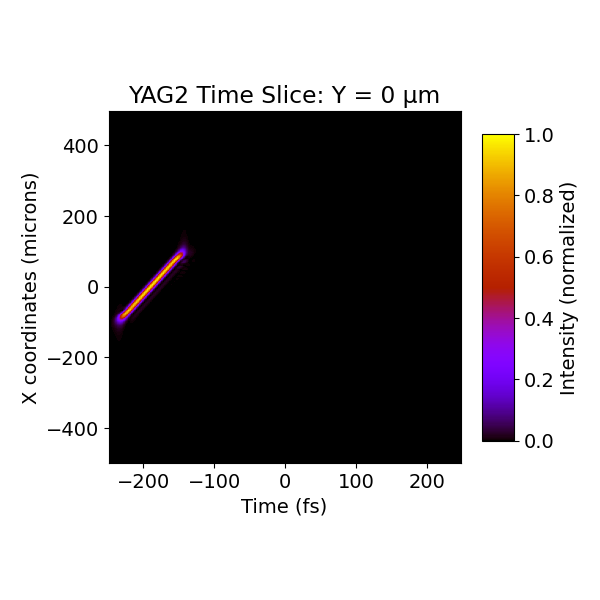

<IPython.core.display.Javascript object>


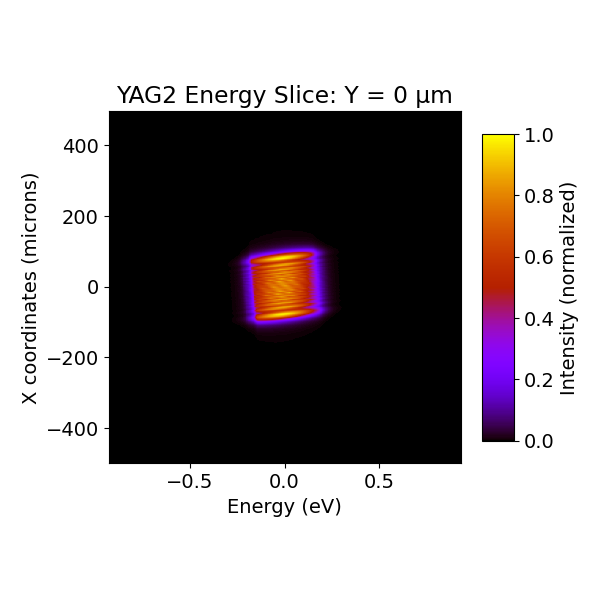

<IPython.core.display.Javascript object>


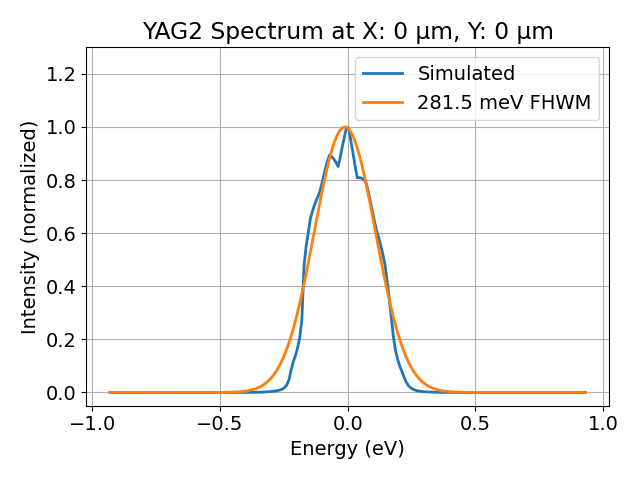

<IPython.core.display.Javascript object>


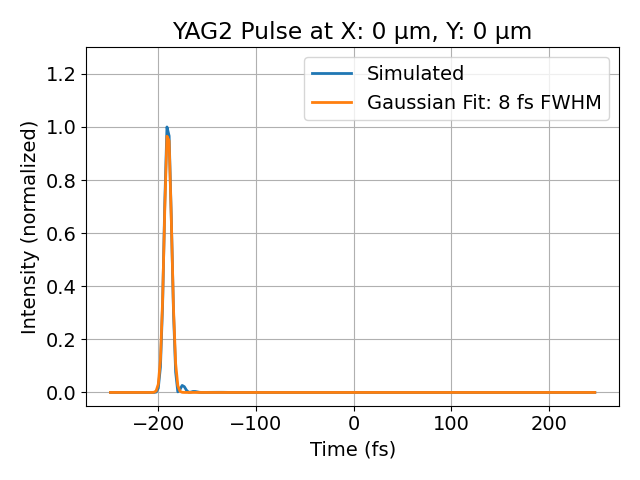

<IPython.core.display.Javascript object>


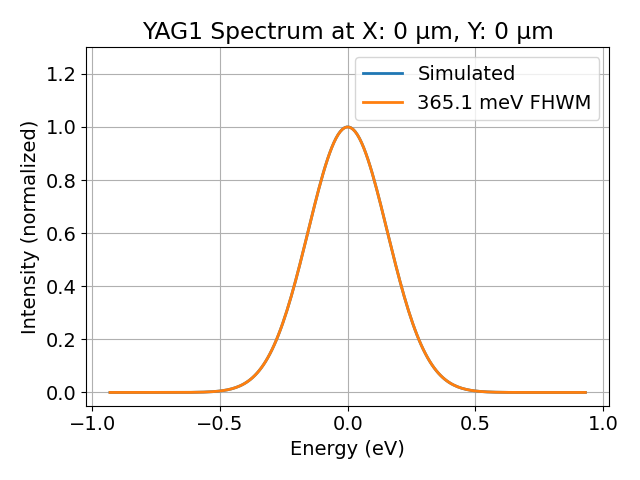

0.45652778231891156
-0.011098442986622103
0.2815325536900428
0.23417951906397577
0.000209286951849112
-1.2453338853153069e-08


In [11]:
# pulse_test.imshow_time_slice('YAG_mid')
# pulse_test.imshow_energy_slice('YAG_mid')
# pulse_test.imshow_time_slice('YAG1')
pulse_test.imshow_time_slice('YAG2')
# pulse_test.imshow_energy_slice('YAG1')
pulse_test.imshow_energy_slice('YAG2')
# pulse_test.plot_spectrum('YAG1')
pulse_test.plot_spectrum('YAG2',x_pos=0)
# pulse_test.plot_pulse('YAG1')
pulse_test.plot_pulse('YAG2')

pulse_test.plot_spectrum('YAG1')

print(pulse_test.pulsefront_tilt('YAG2'))
print(pulse_test.central_energy('YAG2')-pulse_test.E0)
print(pulse_test.pulse_bandwidth('YAG2'))
print(pulse_test.throughput('YAG1','YAG2'))
print(pulse_test.spatial_chirp('YAG2'))
print(pulse_test.spatial_chirp('YAG1'))
# pulse_test.imshow_energy_slice('IP')
# pulse_test.imshow_projection('IP')
# pulse_test.imshow_time_slice('IP')

<IPython.core.display.Javascript object>


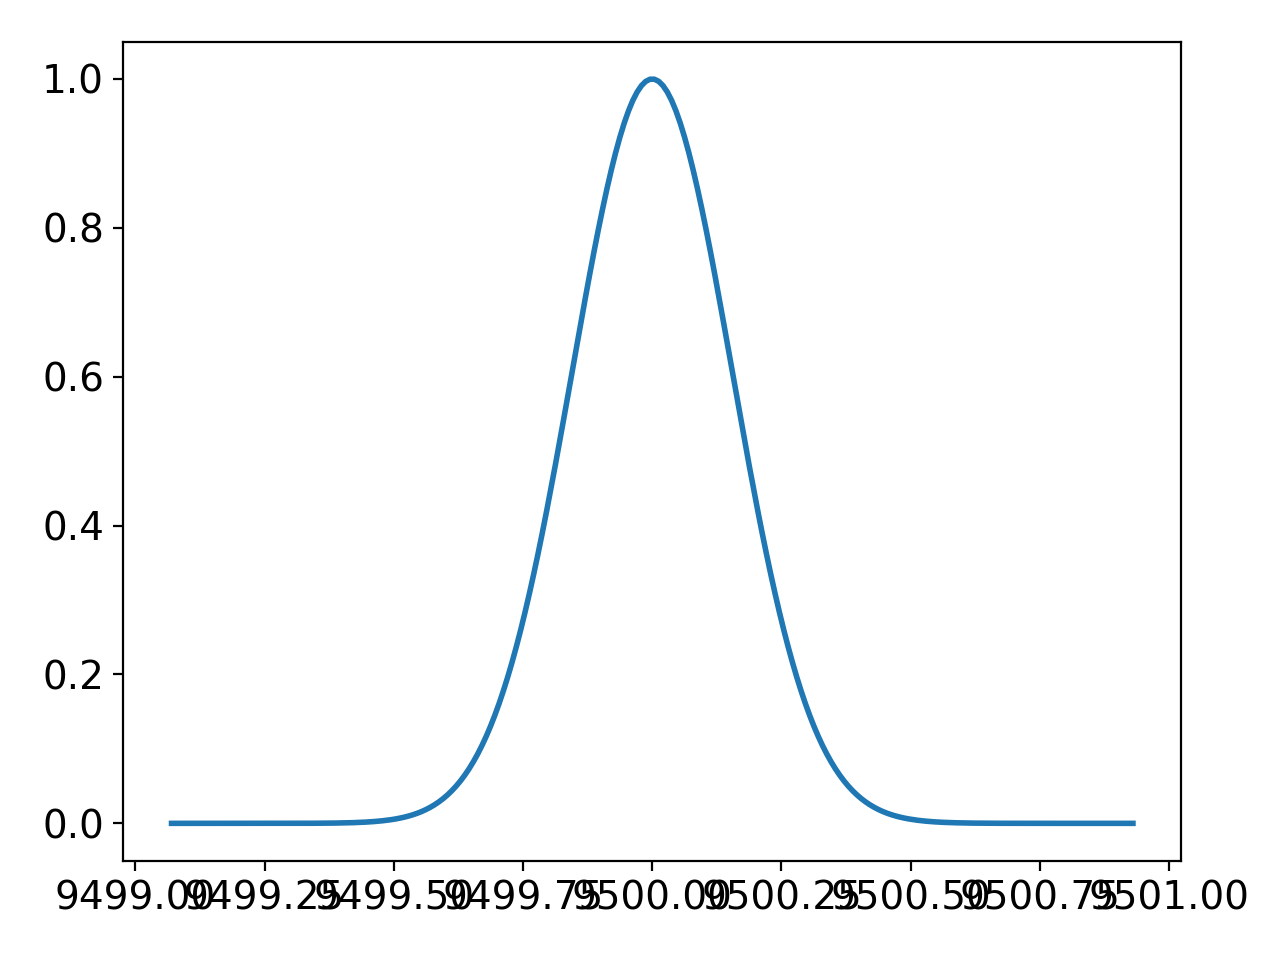

In [68]:
plt.figure()
plt.plot(pulse_test.energy,pulse_test.envelope**2)

In [8]:
(760-343)/180

2.316666666666667

In [33]:
(430-70)/350

1.0285714285714285

In [38]:
(430-90)/300

1.1333333333333333

In [16]:
(90+170)/480

0.5416666666666666

In [21]:
(680-512)/60

2.8